---
# CONNECTEL CUSTOMER CHURN PREDICTION
---

# Problem Definition
---
 - ConnectTel faces a significant issue with customer churn, where valuable customers are leaving the company, impacting its growth and sustainability. 
---
# Objective 
---
 - The objective is to build a predictive model that identifies customers at risk of leaving so that ConnectTel can take proactive measures to retain them.
---
# How the Company Will Benefit from my solution:
---
1. `Proactive Retention`: By predicting which customers are likely to churn, ConnectTel can implement targeted retention strategies.
2. `Cost Efficiency`: Reducing churn can lower the cost associated with acquiring new customers and enhance revenue stability.
3. `Enhanced Customer Experience`: Tailored interventions based on predictive insights can improve customer satisfaction and loyalty.
4. `Competitive Edge`: Effective churn management can strengthen ConnectTel’s competitive position in the telecom market.
---

---
# Project Guide
---

1. Import Relevant Python Libraries
---
2. Data Loading, Cleaning, and Preparation.
---
3. Final Cleaned Data for EDA.
---
4. Exploratory Data Analysis (EDA). 
---
5. Feature Engineering.
---
6. Model selection, training, and validation.
---
7. Model Evaluation
---

# 1. Import Relevant Python Libraries

In [601]:
# For Data Manipulation and Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For feature scaling and encoding
from sklearn.preprocessing import LabelEncoder # - To assigns a unique numerical value to each category in the categorical features.
from sklearn.preprocessing import StandardScaler # It ensures that features contribute equally to the model.

# For splitting data
from sklearn.model_selection import train_test_split

# For Model Selection, Training, and Validation - To Train and Test at Least 3 Supervised Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# For Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# For Hyperparameter Tuning - automating the process of selecting the best parameters to train a model
from sklearn.model_selection import GridSearchCV

# For warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Data Loading, Cleaning, and Preparation.
-  Clean the Dataset.
    -  Investigate Dataset for Anomalies and Data Types.
    -  Investigate missing value.
    -  Drop Irrelevant Feature.
    -  Check for duplicates.
-  Data Type Conversion:
   - SeniorCitizen to Categorical feature/column
   - Churn to Numerical feature/column

In [602]:
# Load Dataset
cust_data = pd.read_csv('Customer-Churn - Customer-Churn.csv')
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Clean the Dataset
- To ensure accuracy, consistency and reliability in the analysis

In [603]:
# Dimensionality of the Data - The number of rows and columns
cust_data.shape # The dataset has 7043 Rows and 21 Columns

(7043, 21)

In [604]:
# Examine the Columns of the Dataset
cust_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [605]:
# Get the data information/types
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [606]:
# Investigate the missing values
cust_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [607]:
# Displaying where the missing values exist
cust_data[cust_data.isnull().any(axis = 1)]  # - Returns a boolean same-sized object indicating if the values are NA or NAN

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The missing values 'NaN' are found in the TotalCharges Column and it will be treated next

In [608]:
# I will get the median of the Column (TC - TotalCharges) 
# Using the median for missing values maintains data integrity by avoiding outlier skew.
tc_median = cust_data['TotalCharges'].median()
tc_median

1397.475

In [609]:
# I will replace the missing values with median using .fillna Method
cust_data['TotalCharges'].fillna(tc_median, inplace = True) 
# Replace the missing value if true (inplace) NA/NAN values with the median value.
print(cust_data['TotalCharges'])

# Check if there are still missing values
cust_data.isnull().sum()

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The missing values in the TotalCharges have been replaced with the median value of the TotalCharges, hence, there no more missing values in the dataset.

In [610]:
# Drop irrelevant columns - The CustomerID column doesnot have any effect on the analysis, hence, it will be dropped
cust_data = cust_data.drop(['customerID'], axis = 1) # Drops specified labels from rows or columns.
cust_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [611]:
# Check for duplicates
cust_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

### Data Type Conversion:
---
- SeniorCitizen to Categorical feature/column
  - Since SeniorCitizen is a binary indicator that identifies whether the customer is a senior citizen or not(0 or 1), converting it to a categorical feature helps in visualizing its relationship with other categorical feature during EDA.
---
- Churn to Numerical feature/column
   - Churn, as the target variable, is converted to numerical values(0/1) for effective model training and statistical analysis.
---

In [612]:
# Convert SeniorCitizen to Categorical feature/column

# SeniorCitizen as a Numerical feature
print(cust_data['SeniorCitizen'])

# Convert using .astype() Method
# cust_data['SeniorCitizen'] = cust_data['SeniorCitizen'].astype('object')
# cust_data['SeniorCitizen']

# Convert using the .replace() Method
cust_data['SeniorCitizen'] = cust_data['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
cust_data['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64


0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

In [613]:
# Convert Churn to Numerical feature/column

# Churn as a Categorical Feature (Yes/No)
print(cust_data['Churn'])

# Convert using the .replace() Method
cust_data['Churn'] = cust_data['Churn'].replace({'Yes': 1, 'No': 0})
cust_data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

# 3. Final Cleaned Data for EDA.
-  Numerical Statistical Analysis.
-  Categorical Statistical Analysis.
-  Summary Statistics

In [614]:
clean_cust_data = cust_data
clean_cust_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [615]:
# Clean data info
clean_cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [616]:
# Numerical Statistical Analysis of the clean data - Mean, Median, Standard Deviation, Max/Min, Interquartile Ranges.
clean_cust_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.000,1.00,1.00


In [617]:
# Categorical Statistical Analysis of the clean data - Unique entries, Frequencies
clean_cust_data.describe(include = ['object', 'bool']).T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [618]:
# Display summary statistics 
summary_stats = clean_cust_data.describe(include = 'all')
summary_stats

# Sort the summary statistics by the mean in descending order
summary_stats = summary_stats.T
sorted_summary_stats = summary_stats.sort_values(by ='mean', ascending = False)
sorted_summary_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TotalCharges,7043.0,NaN,NaN,NaN,2281.916928,2265.270398,18.8,402.225,1397.475,3786.6,8684.8
MonthlyCharges,7043.0,NaN,NaN,NaN,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
Churn,7043.0,NaN,NaN,NaN,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,2,No,5901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Summary Statistics provides insights into the central tendency, dispersion, and shape of the distribution of a dataset's features.

# 4. Exploratory Data Analysis (EDA).
---
-  Conduct Univariate, Bivariate, and Multivariate Analysis as Much as is Feasible.
-  Visualize Relationships Between the Label and Some Key Features.
-  Explore Correlations.
---

### Numerical Features Analysis
##### Univariate Analysis: I will analyze individual numerical feature distributions

In [619]:
# Get the Numerical features in the dataset
all_numerical_features = clean_cust_data.select_dtypes(exclude = 'object')
all_numerical_features

# Exclude the Churn feature - To get the Univariate analysis of the independent numerical features only aside the target feature
numerical_features = all_numerical_features.drop(['Churn'], axis=1)
numerical_features.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


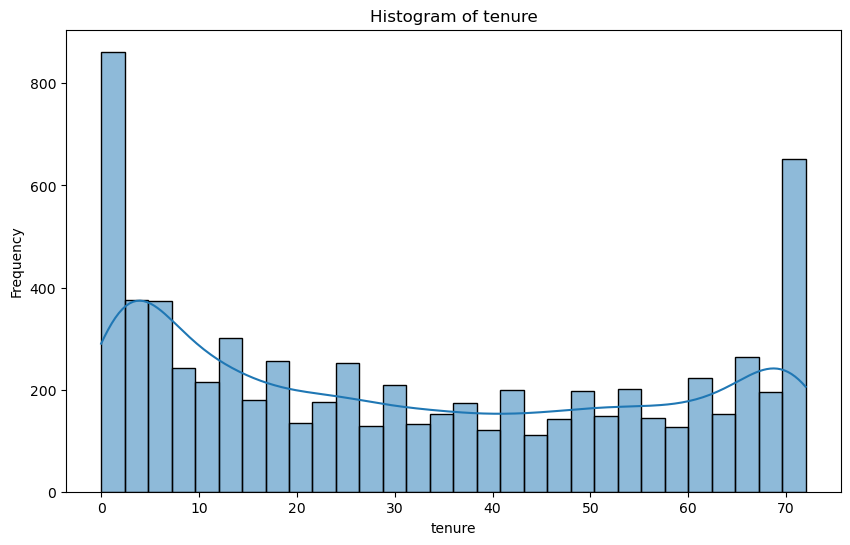

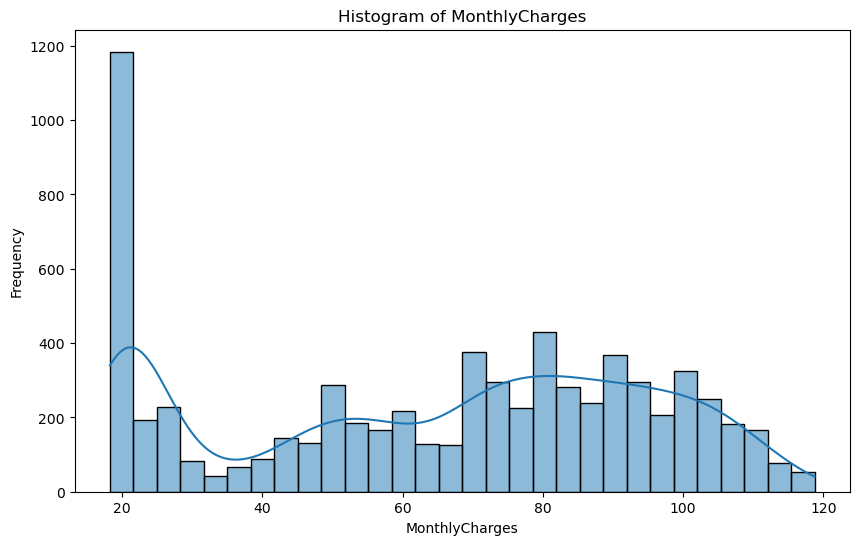

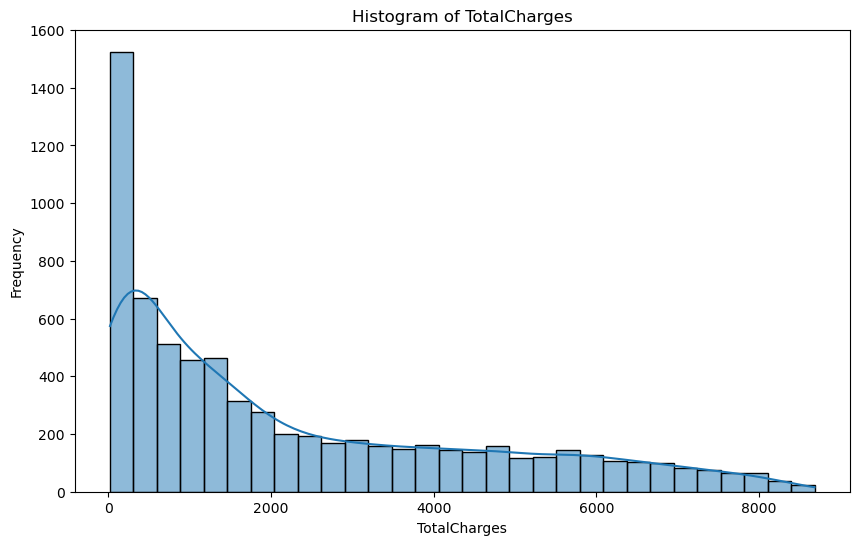

In [620]:
# Plotting histograms for numerical features
print(numerical_features.columns)

for index, feature in enumerate(numerical_features): # enumerate to get feature index/name
    plt.subplots(1, 1, figsize = (10,6))
    sns.histplot(clean_cust_data[feature], kde = True, bins = 30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    plt.show()

The Histograms show the frequency distribution of numerical features, helping to understand their distribution and identify any skewness for the univariate analysis of the numerical features.
- `Tenure`: Shows a uniform distribution with peaks at certain lengths, indicating varied customer retention across different durations.
- `MonthlyCharges`: Show a Right-skewed distribution, with most customers charged lower rates and fewer paying higher rates.
- `TotalCharges`: Show a Right-skewed distribution, with most customers accumulating lower charges, suggesting a larger proportion of newer or lower-usage customers.

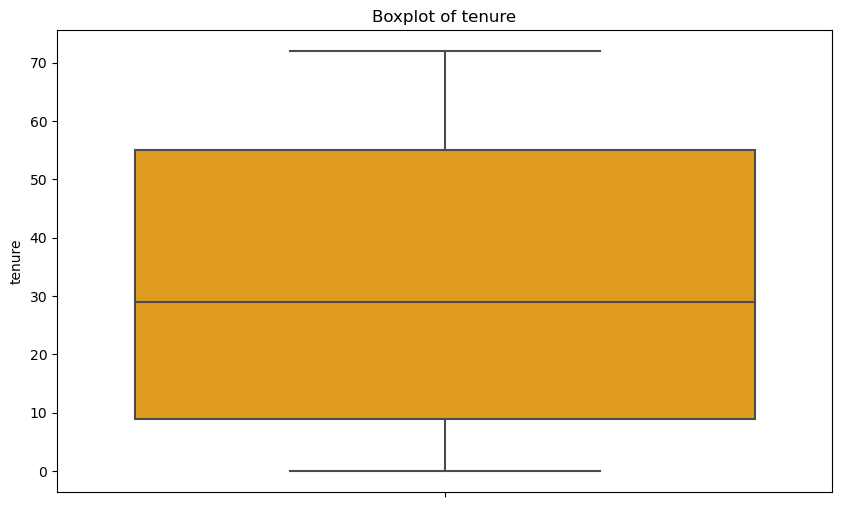

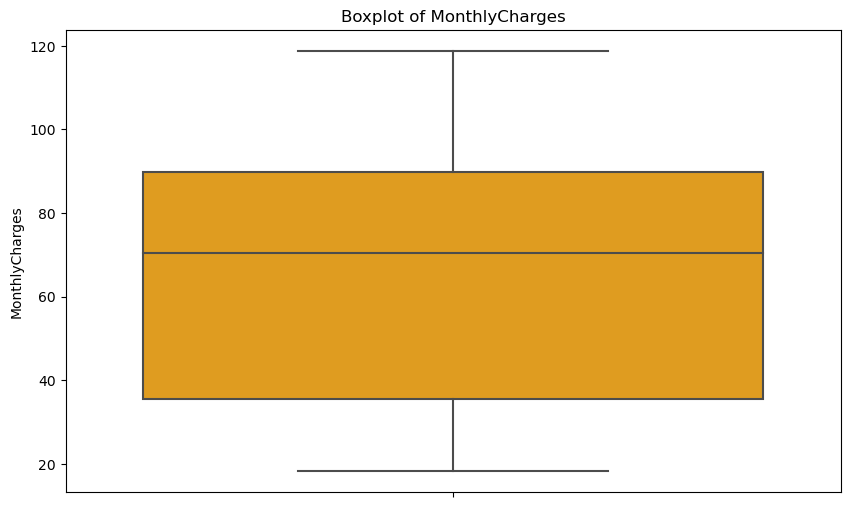

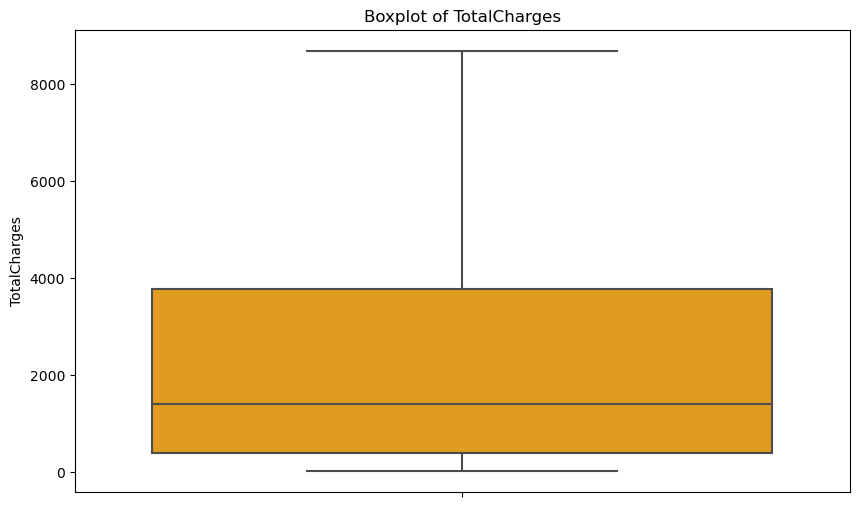

In [621]:
# Plotting boxplots for numerical features to check for outliers
for feature in numerical_features:
    plt.subplots(1, 1, figsize = (10,6))
    sns.boxplot(y = clean_cust_data[feature], color = 'orange')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    
    plt.show()

The Boxplots visualizes the distribution of numerical features and highlights the presence of outliers.
- `Tenure`: No outliers detected. The distribution is centered around 30 months, with a range spanning from 0 to 70 months, indicating a broad spread of customer retention durations.
- `MonthlyCharges`: No outliers detected. Most customers have monthly charges between 37 and 90, with a central tendency around 70, reflecting typical billing amounts without extreme values
- `TotalCharges`: No outliers detected. Charges range from 0 to over 8000, with a median around 1500, showing a broad distribution of accumulated charges without extreme outliers.

### Numerical Features Analysis
##### Bi-variate Analysis: I will explore relationships between pairs of numerical features, particularly focusing on how each feature relates to churn.
  - Plot Scatter Plots - To analyze if there are distinct patterns or clusters in how numerical features relate to churn.
  - Plot Correlation Matrix - To identify which numerical features have strong correlations(positive/negative) with churn.

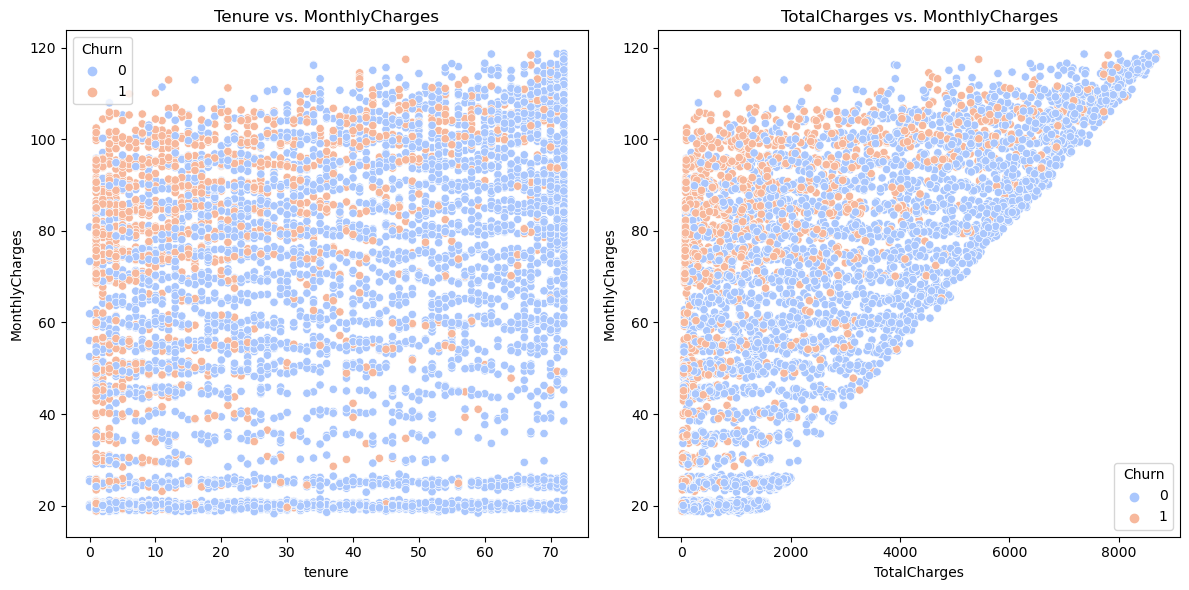

In [622]:
# Plotting Scatter Plots o analyze if there are distinct patterns or clusters in how numerical features relate to churn.
plt.figure(figsize=(12, 6))

# Scatter plot for Tenure vs. MonthlyCharges
plt.subplot(1, 2, 1)
sns.scatterplot(data = clean_cust_data, x ='tenure', y ='MonthlyCharges', hue ='Churn', palette='coolwarm')
plt.title('Tenure vs. MonthlyCharges')

# Scatter plot for TotalCharges vs. MonthlyCharges
plt.subplot(1, 2, 2)
sns.scatterplot(data = clean_cust_data, x ='TotalCharges', y ='MonthlyCharges', hue='Churn', palette='coolwarm')
plt.title('TotalCharges vs. MonthlyCharges')

plt.tight_layout()
plt.show();

###### Insights from Scatter Plots:
1. `Tenure vs. MonthlyCharges`: There is no clear separation between churned and non-churned customers, but churned customers show a broader range of monthly charges.
2. `TotalCharges vs. MonthlyCharges`: Churned customers have more variable total charges for similar monthly charges, indicating diverse spending patterns among churned customers.

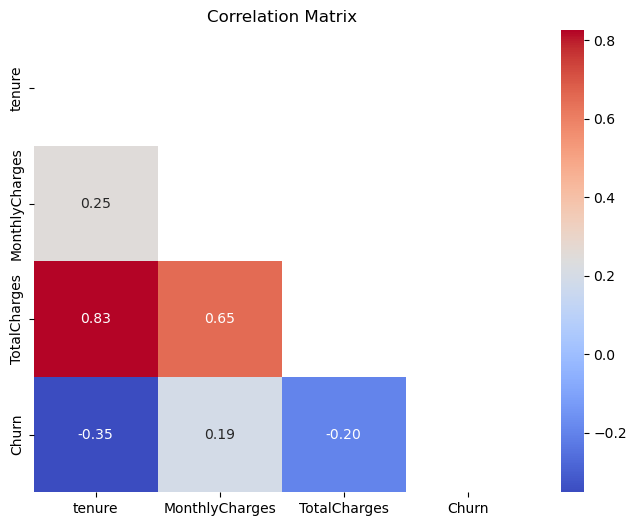

In [623]:
# Plotting Correlation Matrix To identify which numerical features have strong correlations(positive/negative) with churn.
correlation_matrix = clean_cust_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
my_mask = np.triu(np.ones_like(correlation_matrix.corr(), dtype = bool))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask = my_mask)
plt.title('Correlation Matrix')

plt.show();

###### Insights from Correlation Matrix:
1. `Tenure`: is negatively correlated with churn; indicating that longer tenure is linked to lower churn.
2. `MonthlyCharges`: Weakly positively correlated with churn; suggesting that higher charges slightly increase the likelihood of churn.
3. `TotalCharges`: Negatively correlated with churn; indicating that higher total charges are associated with lower churn.
- `Overall`, Tenure and TotalCharges are more strongly correlated with churn, indicating that customers with longer tenures and higher total charges are less likely to churn. Monthly charges have a weaker correlation with churn.

### Numerical Features Analysis
##### Multivariate Analysis: To analyze interactions between multiple features using Pair Plots

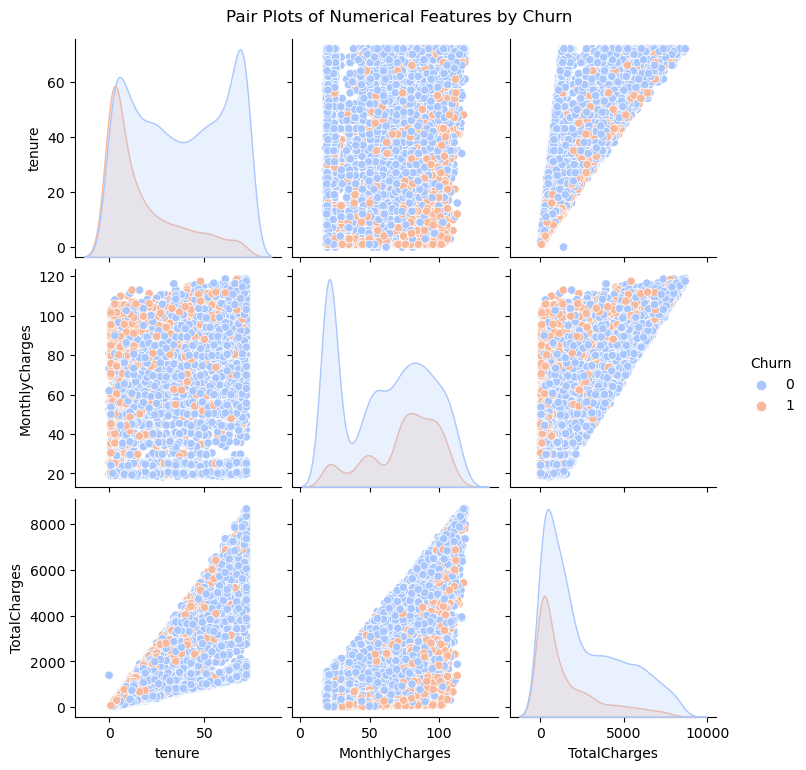

In [624]:
# Creating pair plots 
# to visualize the interactions between numerical features and their relationships with the target variable (churn).

sns.pairplot(clean_cust_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue = 'Churn', palette = 'coolwarm')
plt.suptitle('Pair Plots of Numerical Features by Churn', y = 1.02)
plt.show()

###### Insight from Pair Plots:
1. `Tenure vs. MonthlyCharges with Churn`: Churned customers often have lower monthly charges and shorter tenures, with a narrower range of tenures compared to non-churned customers.

2. `Tenure vs. TotalCharges with Churn`: Churned customers with shorter tenures have lower total charges, whereas non-churned customers exhibit a wider range of total charges across longer tenures

3. `MonthlyCharges vs. TotalCharges with Churn`: Churned customers typically have lower total charges at similar monthly charges compared to non-churned customers, who display a wider range of total charges with higher monthly charges.

`Overall`, Churned customers usually have lower monthly and total charges and shorter tenures compared to non-churned customers.

### Categorical Features Analysis
##### Univariate Analysis: I will analyze individual catigorical feature distributions

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod]
Index: []

 Unique Data in the Categorical Features

 gender -------------->>> 2

 SeniorCitizen -------------->>> 2

 Partner -------------->>> 2

 Dependents -------------->>> 2

 PhoneService -------------->>> 2

 MultipleLines -------------->>> 3

 InternetService -------------->>> 3

 OnlineSecurity -------------->>> 3

 OnlineBackup -------------->>> 3

 DeviceProtection -------------->>> 3

 TechSupport -------------->>> 3

 StreamingTV -------------->>> 3

 StreamingMovies -------------->>> 3

 Contract -------------->>> 3

 PaperlessBilling -------------->>> 2

 PaymentMethod -------------->>> 4

 Frequencies for gender: 
gender
Male      3555
Female    3488
Name: count, dtype: int64


 Frequencies for SeniorCitizen: 
SeniorCitizen

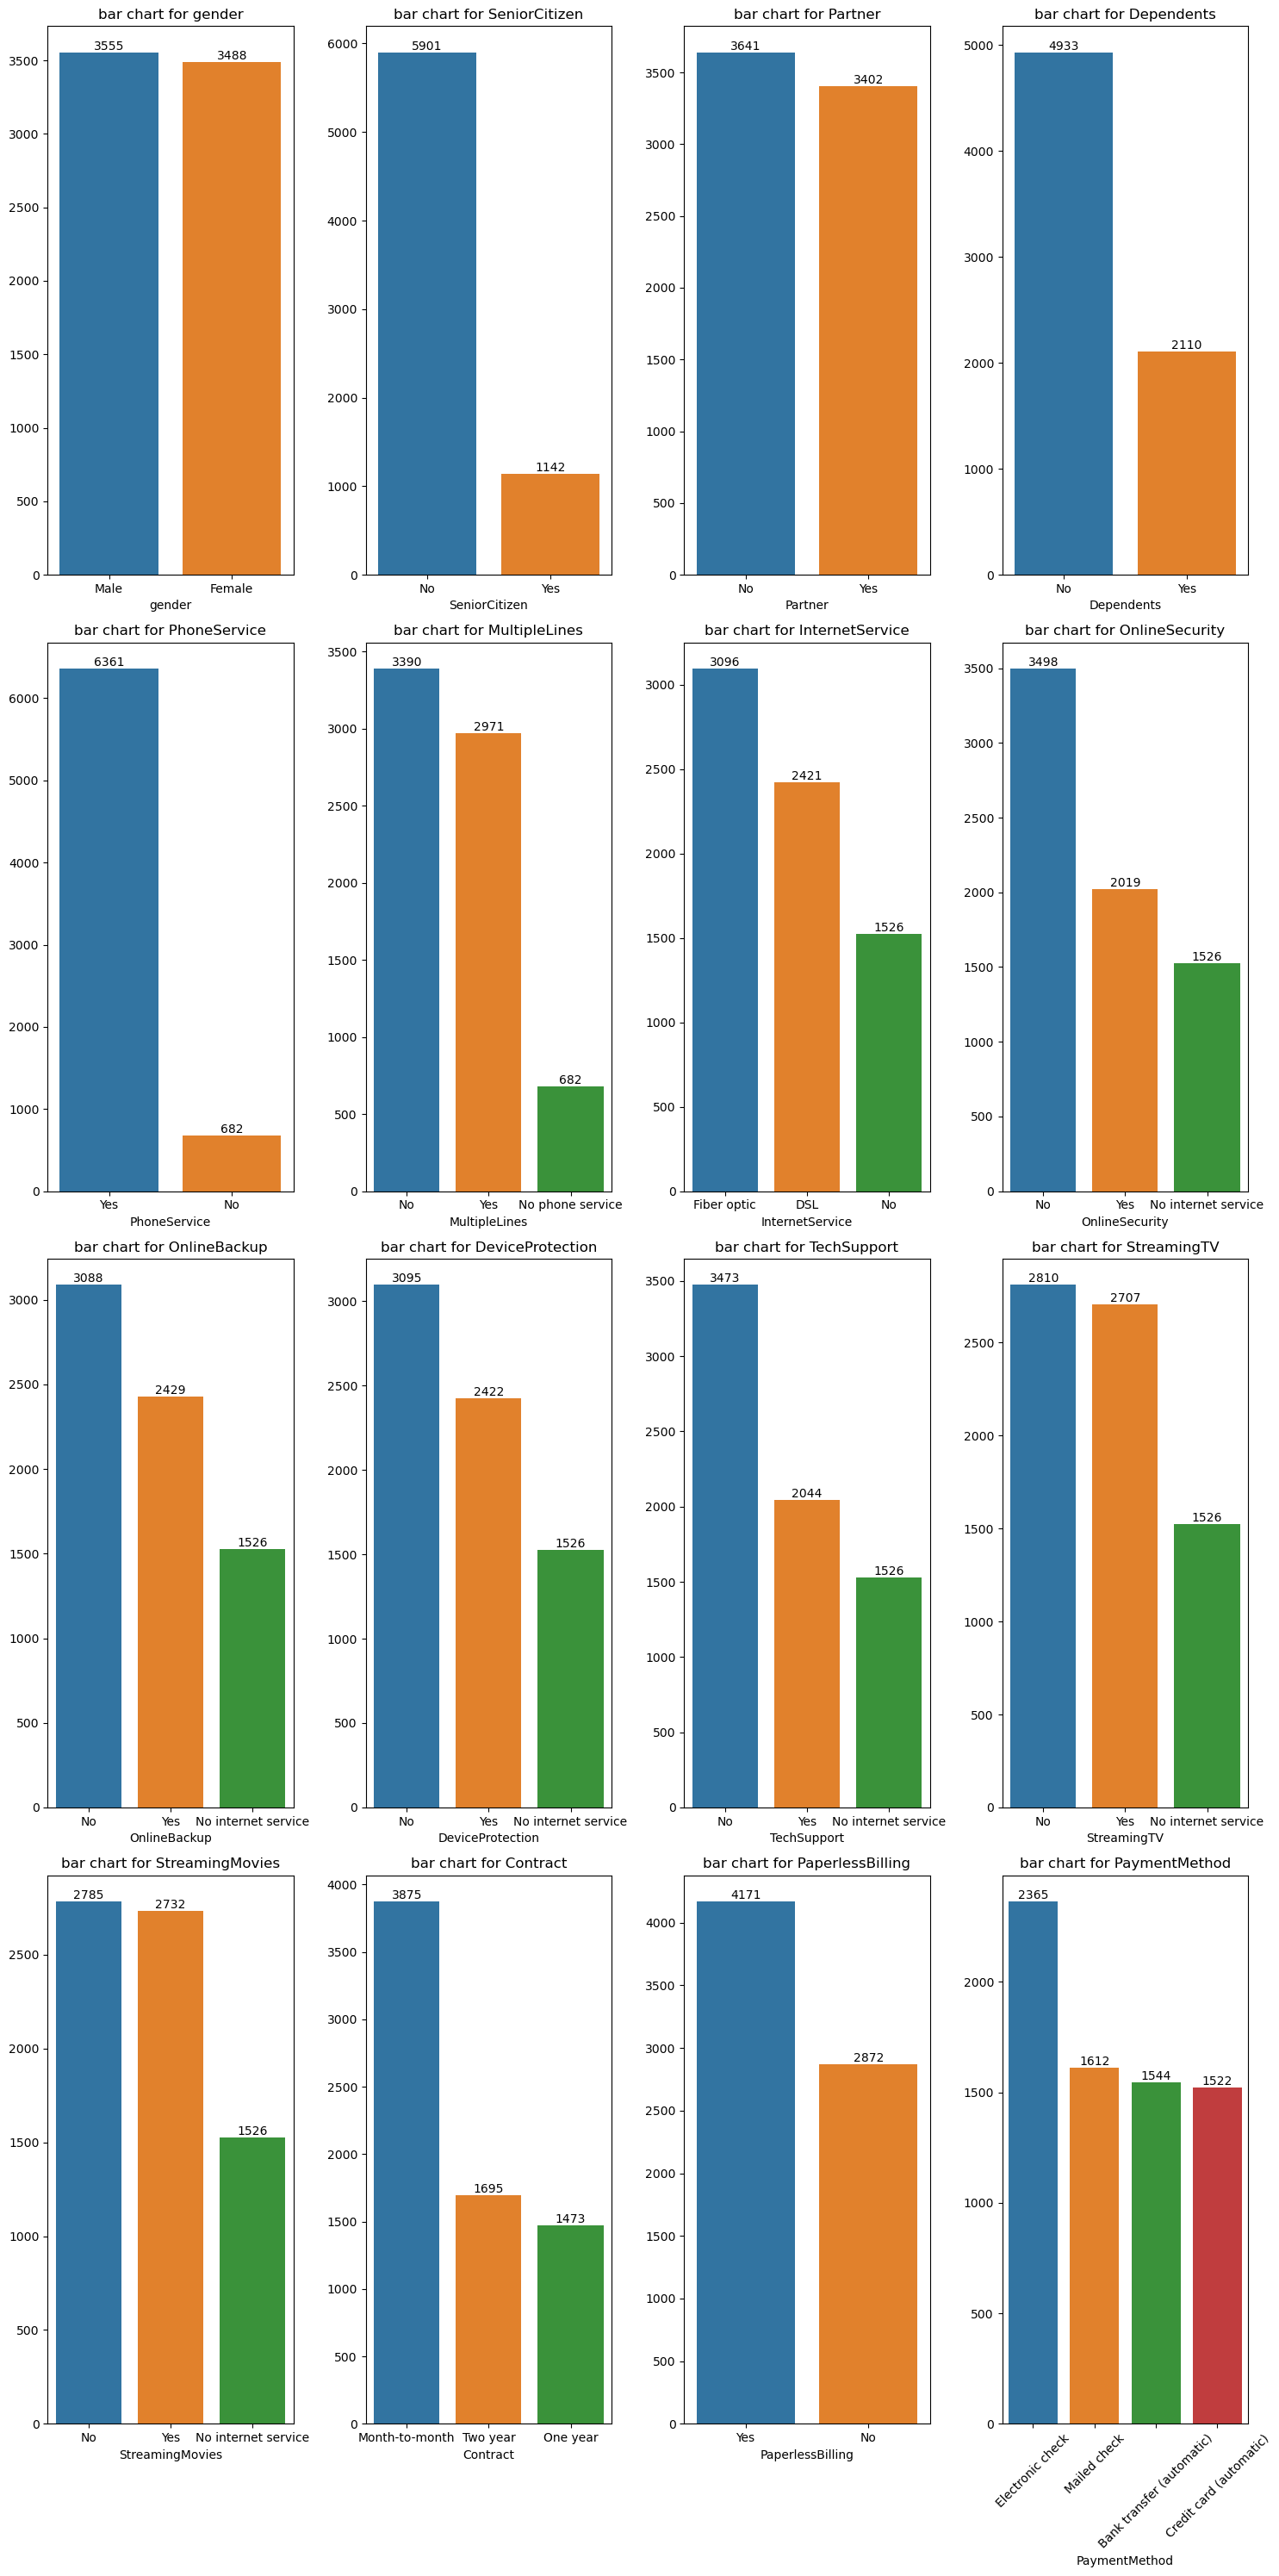

In [625]:
# Get the Categorical features in the dataset
categorical_features = clean_cust_data.select_dtypes(include = 'object')
print(categorical_features.head(0))

# Creating a list of the categorical features
cat_features = categorical_features.columns.to_list()

# Get the number of unique data in the categorical_columns_list
print("\n Unique Data in the Categorical Features")
for feature in cat_features:
    print(f"\n {feature} -------------->>> {clean_cust_data[feature].nunique()}")

# Calculate the Individual Categorical Features Frequencies using for loop
cat_frequencies = {}

for feature in cat_features:
    cat_frequencies[feature] = clean_cust_data[feature].value_counts()

for feature, freq in cat_frequencies.items():
    print(f"\n Frequencies for {feature}: \n{freq}\n")
    
# Plotting distribution for each categorical feature - Univariate Analysis
fig, axs = plt.subplots(4, 4, figsize = (15,30))

position = axs.flatten()

for index, feature in enumerate(cat_features):
    ax = sns.barplot(x = clean_cust_data[feature].value_counts().index, 
                y = clean_cust_data[feature].value_counts().values, 
                ax = position[index])
    position[index].set_title(f"bar chart for {feature}")
    plt.xticks(rotation = 45)  # Rotate x labels if necessary
    ax.bar_label(ax.containers[0])

    
plt.tight_layout()
plt.show();

###### Insight from distribution for each categorical feature:
The bar charts display the distribution of each categorical feature, showing the count of each category.

### Categorical Features Analysis
##### Bi-variate Analysis: I will explore relationships between the categorical features and churn.¶
 
- Exploring the relationship with churn

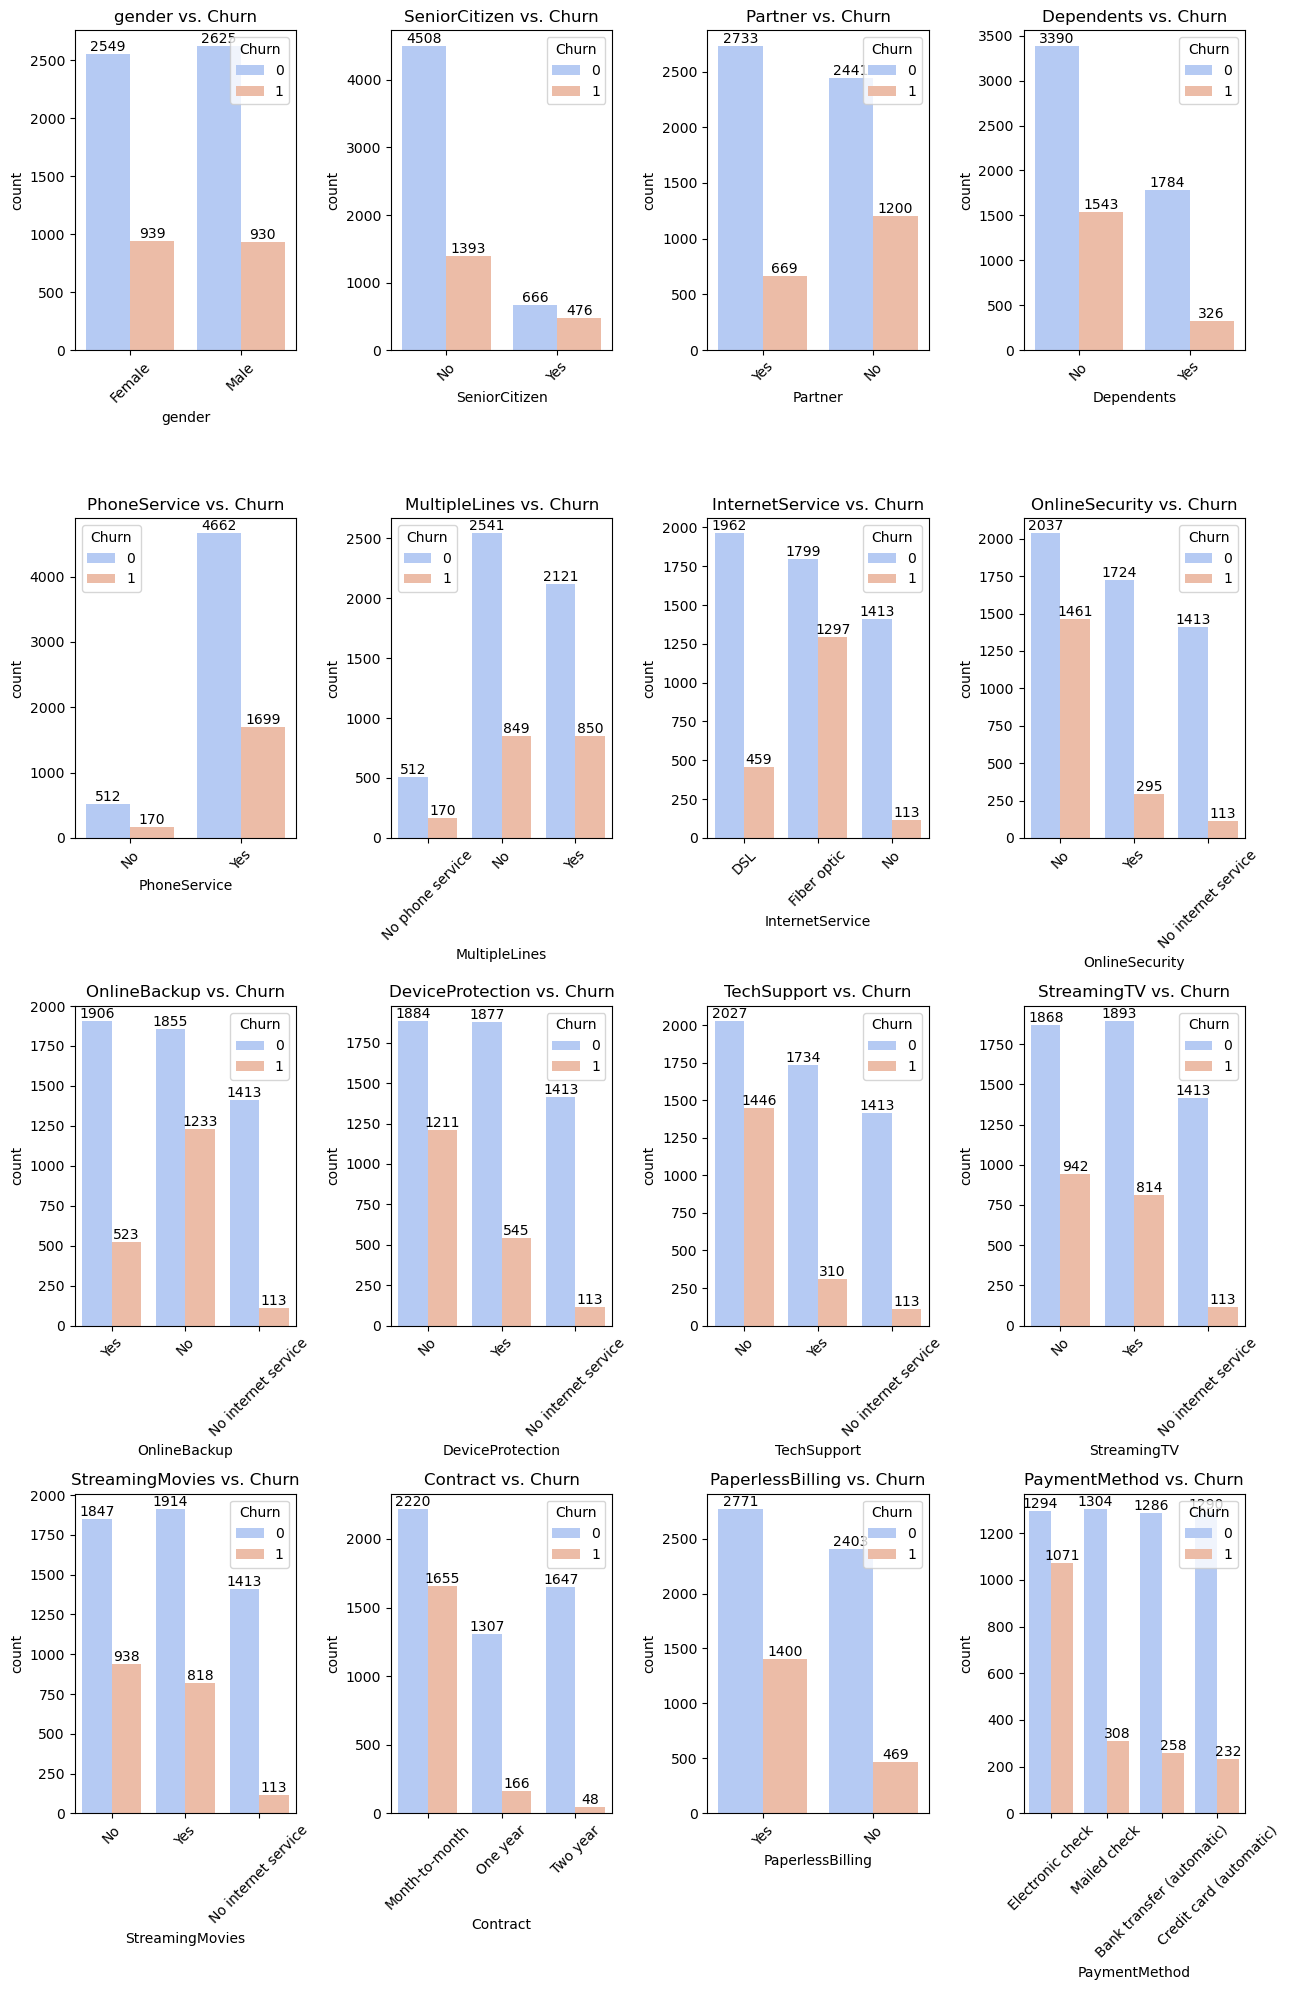

In [626]:
# Plotting relationships between the categorical features and churn.
plt.figure(figsize = (13, 20))

for index, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, index)  # Adjust the number of rows and columns as needed
    ax = sns.countplot(data = clean_cust_data, x = feature, hue = 'Churn', palette = 'coolwarm')
    plt.title(f'{feature} vs. Churn')
    plt.xticks(rotation = 45)  # Rotate x labels if necessary
    ax.bar_label(ax.containers[0])  # Add labels for the first hue level (Churn = 0)No
    ax.bar_label(ax.containers[1])  # Add labels for the second hue level (Churn = 1)Yes

plt.tight_layout()
plt.show()

##### Insight from relationships between the categorical features and churn:

1. `Gender vs. Churn`: The distribution of churn is relatively balanced between male and female customers, indicating no significant gender bias in churn behavior.

2. `SeniorCitizen vs. Churn`: A higher proportion of senior citizens tend to churn compared to non-senior citizens, suggesting age might influence churn.

3. `Partner vs. Churn`: Customers without partners have a higher churn rate, implying that single customers are more likely to churn than those with partners.

4. `Dependents vs. Churn`: Customers without dependents are more likely to churn, indicating that having dependents might contribute to customer retention.

5. `PhoneService vs. Churn`: Both customers with and without phone service show similar churn rates, suggesting phone service alone does not significantly impact churn.

6. `MultipleLines vs. Churn`: Customers without multiple lines have a slightly higher churn rate, indicating that having multiple lines might be associated with lower churn.

7. `InternetService vs. Churn`: Customers with fiber optic internet service have a higher churn rate compared to those with DSL or no internet service, indicating that fiber optic users might be more prone to churn.

8. `OnlineSecurity vs. Churn`: Customers without online security services exhibit a higher churn rate, suggesting that offering online security might reduce churn.

9. `OnlineBackup vs. Churn`: Customers without online backup services are more likely to churn, indicating that online backup services could be a factor in retention.

10. `DeviceProtection vs. Churn`: Higher churn is observed among customers without device protection services, suggesting that device protection might help retain customers.

11. `TechSupport vs. Churn`: Customers without tech support services have a higher churn rate, indicating that tech support could play a crucial role in customer retention.

12. `StreamingTV vs. Churn`: Churn rates are higher among customers without streaming TV services, implying that offering streaming TV might reduce churn.

13. `StreamingMovies vs. Churn`: Customers without streaming movies services show higher churn, suggesting that streaming movie services could be beneficial for retention.

14. `Contract vs. Churn`: Customers with month-to-month contracts have a significantly higher churn rate compared to those with one or two-year contracts, indicating that longer contracts are associated with lower churn.

15. `PaperlessBilling vs. Churn`: Higher churn rates are seen among customers with paperless billing, suggesting that paperless billing might be linked to higher churn.

16. `PaymentMethod vs. Churn`: Customers paying with electronic checks exhibit higher churn rates, whereas those using other payment methods like mailed checks, bank transfers, or credit cards show lower churn, indicating that payment method can influence churn.

### Categorical Features Analysis
##### Multivariate Analysis: 

Given the insights gained from my extensive exploratory data analysis (EDA), here is a rationale for moving directly to feature engineering instead of performing further multivariate analysis of categorical features:

#### Reasons for Skipping Further Multivariate Analysis
1. Comprehensive Insights Already Gained:

- Univariate Analysis: Provided a clear understanding of the distribution and frequencies of each categorical feature, which is crucial for recognizing patterns and potential issues in the data.
- Bivariate Analysis: Offered valuable insights into how individual categorical features relate to churn, identifying specific features that have a significant impact on customer churn, such as SeniorCitizen, Partner, Dependents, InternetService, OnlineSecurity, TechSupport, Contract, and PaymentMethod.
- Numerical Features Analysis: Highlighted important relationships and correlations between numerical features and churn, such as the negative correlation of Tenure and TotalCharges with churn and the weak positive correlation of MonthlyCharges.

2. Clear Relationships Identified:

- The bivariate analyses have already illuminated how key categorical features influence churn. For example, customers with month-to-month contracts and without partners or dependents have higher churn rates. This information is sufficient to guide feature engineering efforts without additional multivariate analysis.

The EDA has thoroughly explored the dataset and its features in relation to churn, providing a solid foundation through univariate and bivariate analyses. Skipping further multivariate analysis of categorical features is a strategic choice to streamline the process and focus on feature engineering, preparing the data for the next steps in modeling.

## Summary of Exploratory Data Analysis (EDA) for Connectel Customer Churn

---
1. `Univariate, Bivariate, and Multivariate Analysis of Numerical Features`

    a) `Univariate Analysis`:
    I examined the numerical features — Tenure, MonthlyCharges, and TotalCharges — using histograms and boxplots.
    - `Histograms`:
       - `Tenure`: I observed a uniform distribution with some peaks at specific lengths, indicating diverse customer retention durations.
       - `MonthlyCharges`: This feature showed a right-skewed distribution, with most customers having lower charges and fewer customers paying higher amounts.
       - `TotalCharges`: This also exhibited a right-skewed distribution, suggesting that most customers have lower total charges, which points to a higher proportion of newer or low-usage customers.
    - `Boxplots`:
       - `Tenure`: There were no significant outliers. The distribution centered around 30 months, with values ranging from 0 to 70 months.
       - `MonthlyCharges`: No significant outliers were found, with most values between 37 and 90, reflecting typical billing amounts.
       - `TotalCharges`: The range extended from 0 to over 8000, with a median around 1500, indicating a broad spread without extreme outliers.
      
    b) `Bivariate Analysis`:
    I explored the relationships between pairs of numerical features through scatter plots and a correlation matrix.
    - `Scatter Plots':
       - `Tenure vs. MonthlyCharges`: I did not find a clear separation between churned and non-churned customers, but churned customers exhibited a broader range of monthly charges.
       - `TotalCharges vs. MonthlyCharges`: Churned customers showed more variability in total charges for similar monthly charges.
    - `Correlation Matrix`:
        - `Tenure`: It had a strong negative correlation with churn, indicating that longer tenures are associated with lower churn.
       - `MonthlyCharges`: This feature had a weak positive correlation with churn, suggesting that higher charges slightly increase the likelihood of churn.
       - `TotalCharges`: This showed a strong negative correlation with churn, indicating that higher total charges are linked to lower churn.
       
    c) `Multivariate Analysis`:
    I used pair plots to analyze how combinations of features interact with churn.
    - `Pair Plots`:
       - `Tenure vs. MonthlyCharges with Churn`: Churned customers generally had lower monthly charges and shorter tenures, with less variability in tenure.
       - `Tenure vs. TotalCharges with Churn`: Churned customers with shorter tenures had lower total charges, whereas non-churned customers displayed a wider range of total charges across longer tenures.
       - `MonthlyCharges vs. TotalCharges with Churn`: Churned customers typically had lower total charges at similar monthly charges compared to non-churned customers, who exhibited a broader range of total charges with higher monthly charges.
---
2. `Univariate and Bivariate Analysis of Categorical Features`

    a) `Univariate Analysis`:
    I assessed the distribution of categorical features by examining frequency counts and bar charts.
    - `Frequencies`:
       - `Gender`: The distribution was nearly balanced between male and female customers.
       - `SeniorCitizen`: There were more non-senior citizens compared to senior citizens.
       - `Partner and Dependents`: More customers had partners and dependents than those who did not.
       - `PhoneService`: The majority of customers had phone service.
       - `MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies`: These features had varied distributions, with some having three categories or more.
       - `Contract and PaymentMethod`: These had multiple types with different frequencies.
       - `PaperlessBilling`: More customers opted for paperless billing over traditional billing.
       
    b) `Bivariate Analysis`:
    I investigated how categorical features relate to churn using bar charts.
    - `Gender`: Churn rates were balanced between male and female customers.
    - `SeniorCitizen`: Senior citizens showed higher churn rates compared to non-senior citizens.
    - `Partner`: Single customers had higher churn rates than those with partners.
    - `Dependents`: Customers without dependents were more likely to churn, suggesting dependents contribute to retention.
    - `PhoneService`: Churn rates were similar for customers with and without phone service.
    - `MultipleLines`: Customers without multiple lines had a slightly higher churn rate.
    - `InternetService`: Fiber optic users had a higher churn rate compared to DSL or no internet service users.
    - `OnlineSecurity`: Higher churn rates were observed among customers without online security services.
    - `OnlineBackup`: Customers without online backup services showed higher churn rates.
    - `DeviceProtection`: Higher churn was noted among customers without device protection services.
    - `TechSupport`: Customers lacking tech support services had higher churn rates.
    - `StreamingTV and StreamingMovies`: Higher churn rates were found among customers without these services.
    - `Contract`: Month-to-month contracts had significantly higher churn rates compared to one or two-year contracts.
    - `PaperlessBilling`: Customers with paperless billing exhibited higher churn rates.
    - `PaymentMethod`: Electronic checks were associated with higher churn rates, while other methods like mailed checks, bank transfers, or credit cards had lower churn rates.
---    
3. `Covering of EDA Objectives`

    a) `Conduct Univariate, Bivariate, and Multivariate Analysis`: 
    I performed a comprehensive analysis of both numerical and categorical features. Numerical features were examined through univariate, bivariate, and multivariate analyses, while categorical features were analyzed through univariate and bivariate methods.
    
    b) `Visualize Relationships Between the Label and Some Key Features`: 
    I used histograms, boxplots, scatter plots, and bar charts to illustrate how various features relate to churn, revealing significant patterns and relationships.
    
    c) `Explore Correlations`: The correlation matrix and bivariate analysis for numerical features provided insights into how these features correlate with churn. Significant trends were identified, such as the strong negative correlation between tenure and churn.
    
`Overall`, my EDA effectively met the project objectives by offering detailed insights into how different features influence customer churn, setting a solid foundation for further model development and feature engineering.

#### Target Feature 'Churn' Description

Churn Unique Values Type
Index([0, 1], dtype='int64', name='Churn')

Churn Unique Values Count
[5174 1869]


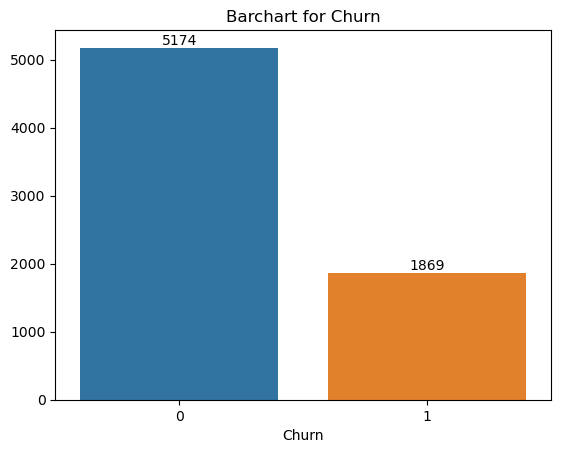

In [627]:
# Exxtracting the unique values type of the target feature
print('Churn Unique Values Type')
print(clean_cust_data['Churn'].value_counts().index)

# Retrieving an array of the counts of each unique value in the target feature
print(f'\nChurn Unique Values Count')
print(clean_cust_data['Churn'].value_counts().values)

# Creating a barplot to show the distribution of counts for each category within the target feature
ax = sns.barplot(x = clean_cust_data['Churn'].value_counts().index, 
                 y = clean_cust_data['Churn'].value_counts().values)
plt.title('Barchart for Churn')
ax.bar_label(ax.containers[0]);

The barplot shows that the number of instances with non-churn `0` significantly exceeds the number of instances with a churn `1`, indicating a higher prevalence of non-churn in the customer churn dataset.

# 5. Feature Engineering

- a) Creating new features from existing features, based on insights from my EDA
- b) Encoding categorical variables

### a) Creating new features from existing features, based on insights from my EDA

- Based on the insights from my EDA,  I will create the following new features
(The new features are expected to have a meaningful impact on model performance based on their relationship with churn.):

    1. TotalChargesPerMonth
    2. Tenure_MonthlyCharges_Ratio
    3. HighChargesFlag
    4. LowChargesFlag
    5. HasMultipleLines
    6. HasFiberOptic

In [628]:
# Creating new features based on the refined list

# 1. TotalChargesPerMonth: Total Charges divided by Tenure
clean_cust_data['TotalChargesPerMonth'] = clean_cust_data['TotalCharges'] / clean_cust_data['tenure']
clean_cust_data['TotalChargesPerMonth'].replace([np.inf, -np.inf], 0, inplace = True)  # Handling division by zero

In [629]:
# 2. Tenure_MonthlyCharges_Ratio: Tenure divided by Monthly Charges
clean_cust_data['Tenure_MonthlyCharges_Ratio'] = clean_cust_data['tenure'] / clean_cust_data['MonthlyCharges']
clean_cust_data['Tenure_MonthlyCharges_Ratio'].replace([np.inf, -np.inf], 0, inplace=True)  # Handling division by zero

In [630]:
# 3. HighChargesFlag: A binary flag indicating if Monthly Charges are higher than a certain threshold (e.g., 75th percentile)
high_charge_threshold = clean_cust_data['MonthlyCharges'].quantile(0.75)
clean_cust_data['HighChargesFlag'] = (clean_cust_data['MonthlyCharges'] > high_charge_threshold).astype(int)

In [631]:
# 4. LowChargesFlag: A binary flag indicating if Monthly Charges are lower than a certain threshold (e.g., 25th percentile)
low_charge_threshold = clean_cust_data['MonthlyCharges'].quantile(0.25)
clean_cust_data['LowChargesFlag'] = (clean_cust_data['MonthlyCharges'] < low_charge_threshold).astype(int)

In [632]:
# 5. HasMultipleLines: A binary flag indicating if the customer has multiple lines
clean_cust_data['HasMultipleLines'] = np.where(clean_cust_data['MultipleLines'] == 'Yes', 1, 0)

In [633]:
# 6. HasFiberOptic: A binary flag indicating if the customer uses fiber optic internet service
clean_cust_data['HasFiberOptic'] = np.where(clean_cust_data['InternetService'] == 'Fiber optic', 1, 0)

In [634]:
# Inspecting the newly created features
print(clean_cust_data[['TotalChargesPerMonth', 'Tenure_MonthlyCharges_Ratio', 'HighChargesFlag', 
          'LowChargesFlag', 'HasMultipleLines', 'HasFiberOptic']].head())

# Checking for any missing values in the newly created features
print(f'\nMissing Value Check:')
print(clean_cust_data[['TotalChargesPerMonth', 'Tenure_MonthlyCharges_Ratio', 'HighChargesFlag', 
          'LowChargesFlag', 'HasMultipleLines', 'HasFiberOptic']].isnull().sum())

   TotalChargesPerMonth  Tenure_MonthlyCharges_Ratio  HighChargesFlag  \
0             29.850000                     0.033501                0   
1             55.573529                     0.597015                0   
2             54.075000                     0.037140                0   
3             40.905556                     1.063830                0   
4             75.825000                     0.028289                0   

   LowChargesFlag  HasMultipleLines  HasFiberOptic  
0               1                 0              0  
1               0                 0              0  
2               0                 0              0  
3               0                 0              0  
4               0                 0              1  

Missing Value Check:
TotalChargesPerMonth           0
Tenure_MonthlyCharges_Ratio    0
HighChargesFlag                0
LowChargesFlag                 0
HasMultipleLines               0
HasFiberOptic                  0
dtype: int64


In [635]:
# Apply the changes to the dataset
clean_cust_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesPerMonth,Tenure_MonthlyCharges_Ratio,HighChargesFlag,LowChargesFlag,HasMultipleLines,HasFiberOptic
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,Electronic check,29.85,29.85,0,29.850000,0.033501,0,1,0,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,Mailed check,56.95,1889.50,0,55.573529,0.597015,0,0,0,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,1,54.075000,0.037140,0,0,0,0
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Bank transfer (automatic),42.30,1840.75,0,40.905556,1.063830,0,0,0,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,Electronic check,70.70,151.65,1,75.825000,0.028289,0,0,0,1


##### To create new features, I used the following criteria:

1. `Relevance to Insights`:
    - TotalChargesPerMonth: Normalizes total charges by tenure, linking to spending behavior and the impact of Tenure on MonthlyCharges.
    - Tenure_MonthlyCharges_Ratio: Captures the interaction between Tenure and MonthlyCharges.
    - HighChargesFlag: Identifies high-value customers based on the skew in MonthlyCharges and its impact on churn.
    - LowChargesFlag: Flags customers with lower charges, linked to higher churn rates.
    - HasMultipleLines: Reflects higher churn rates in customers without multiple lines.
    - HasFiberOptic: Highlights the higher churn rate among customers using fiber optic internet service.
---
2. `Impact on Model Performance`:
    - The new features are designed to capture significant patterns from the EDA and are expected to meaningfully enhance model performance by reflecting their relationship with churn.
---
3. `Avoiding Redundancy`:
    - Avoiding features that might be too similar to others or might not add new information. For example, ServiceCount and Tenure_Bucket were considered but might add complexity without substantial additional value.
---
4. `Simplicity and Manageability`:
    - The focus is on a manageable number of features to keep the model simple and interpretable, avoiding overfitting and unnecessary complexity.
    
`Summary`: 
- The created features are designed to impact model performance by capturing key patterns related to churn from my EDA. To maintain simplicity and avoid redundancy, features that were too similar to others or added unnecessary complexity (for example, ServiceCount and Tenure_Bucket) were excluded. This approach ensures the model remains interpretable and avoids overfitting, focusing on features that offer the most value.

### b) Encoding categorical variables
- I will use:
   - `LabelEncoder` to convert categorical features into numerical values, making them suitable for machine learning models that require numerical input.

In [636]:
# List of categorical columns to encode
categorical_features.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [637]:
# Initialize LabelEncoder
encoder = LabelEncoder()

In [638]:
# Apply LabelEncoder to each categorical feature
for feature in categorical_features:
    clean_cust_data[feature] = encoder.fit_transform(clean_cust_data[feature])
clean_cust_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesPerMonth,Tenure_MonthlyCharges_Ratio,HighChargesFlag,LowChargesFlag,HasMultipleLines,HasFiberOptic
0,0,0,1,0,1,0,1,0,0,2,...,2,29.85,29.85,0,29.850000,0.033501,0,1,0,0
1,1,0,0,0,34,1,0,0,2,0,...,3,56.95,1889.50,0,55.573529,0.597015,0,0,0,0
2,1,0,0,0,2,1,0,0,2,2,...,3,53.85,108.15,1,54.075000,0.037140,0,0,0,0
3,1,0,0,0,45,0,1,0,2,0,...,0,42.30,1840.75,0,40.905556,1.063830,0,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,2,70.70,151.65,1,75.825000,0.028289,0,0,0,1


LabelEncoder is used to convert categorical features into numerical values in the customer churn dataset. It encodes features such as gender, SeniorCitizen, and various services into numeric labels, ensuring they are ready for machine learning. After encoding, it updates the dataset.

# 6. Model selection, training, validation, and Evaluation.

    a) Data splitting - Train and Test sets
    b) Train and test at least 3 supervised learning models
       - Analyze the results of your trained model
       - What metrics are most important for the problem? Should the business be more concerned with better results on false negatives or true positives

### a) Data splitting - Train and Test sets

In [639]:
 # Create a copy of the data 'clean_cust_data' is the preprocessed dataset - features and 'Churn' is my target variable
X = clean_cust_data.drop('Churn', axis = 1)  # Features
y = clean_cust_data['Churn']               # Target

In [640]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TotalChargesPerMonth,Tenure_MonthlyCharges_Ratio,HighChargesFlag,LowChargesFlag,HasMultipleLines,HasFiberOptic
0,0,0,1,0,1,0,1,0,0,2,...,1,2,29.85,29.85,29.850000,0.033501,0,1,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,3,56.95,1889.50,55.573529,0.597015,0,0,0,0
2,1,0,0,0,2,1,0,0,2,2,...,1,3,53.85,108.15,54.075000,0.037140,0,0,0,0
3,1,0,0,0,45,0,1,0,2,0,...,0,0,42.30,1840.75,40.905556,1.063830,0,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,1,2,70.70,151.65,75.825000,0.028289,0,0,0,1


In [641]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [642]:
# Check if number of elements(rows) in the features and target are equal before spliting the data
print(len(X))
print(len(y))
len(X) == len(y)

7043
7043


True

In [643]:
# Split the data into training and test sets (using 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [644]:
# Train Set - 80%
train_set = [[X_train, y_train]]
print('Train Set - X_train')
print(X_train.head(0))
print(f'\nTrain Set - y_train')
print(y_train.head(0))
print(f'\nTrain Set = {len(X_train)}')

Train Set - X_train
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, TotalChargesPerMonth, Tenure_MonthlyCharges_Ratio, HighChargesFlag, LowChargesFlag, HasMultipleLines, HasFiberOptic]
Index: []

[0 rows x 25 columns]

Train Set - y_train
Series([], Name: Churn, dtype: int64)

Train Set = 5634


In [645]:
# Test Set - 20%
test_set = [[X_test, y_test]]
print('Test Set - X_test')
print(X_test.head(0))
print(f'\nTest Set - y_test')
print(y_test.head(0))
print(f'\nTest Set = {len(X_test)}')

Test Set - X_test
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, TotalChargesPerMonth, Tenure_MonthlyCharges_Ratio, HighChargesFlag, LowChargesFlag, HasMultipleLines, HasFiberOptic]
Index: []

[0 rows x 25 columns]

Test Set - y_test
Series([], Name: Churn, dtype: int64)

Test Set = 1409


In [646]:
# Check if sum of elements (rows) in train set and test set equals the numebr of total elements in the dataset
len(X_train) + len(X_test) == len(clean_cust_data) # 5634 + 1409 = 7043

True

I used 80-20 split. This allows for effective model training with 80% of the data, while the remaining 20% is used for reliable performance evaluation on unseen data, ensuring a well-trained and properly tested model.

### b) Train and test at least 3 supervised learning models
- I will Train and Test these 4 Supervised Learning Models
1. `Logistic Regression` - This a simple, interpretable model that serves as a baseline for binary classification, making it useful for understanding feature importance in tasks like customer churn prediction.
---
2. `Random Forest Classifier` - This is a robust ensemble model that handles complex feature relationships and interactions. It is resistant to overfitting and provides feature importance insights, making it valuable for understanding data in customer churn prediction.
---
3. `DecisionTreeClassifier` - This model is highly interpretable and handles non-linear relationships well, making it suitable for complex datasets.
---
4. `XGBoost Classifier` -  This is powerful for imbalanced datasets like customer churn, capturing non-linear patterns and feature interactions, often resulting in high predictive accuracy.

In [653]:
# Initialize the classifiers in a list and train the models
classifiers = [[LogisticRegression(random_state = 42), 'Logistic Regression'],
               [RandomForestClassifier(random_state = 42), 'Random Forest'],
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
               [XGBClassifier(random_state = 42), 'XGBoost Classifier'],
              ]


<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8592    0.8832    0.8710      1036
           1     0.6483    0.5979    0.6220       373

    accuracy                         0.8077      1409
   macro avg     0.7537    0.7405    0.7465      1409
weighted avg     0.8033    0.8077    0.8051      1409

Confusion Matrix:
 [[915 121]
 [150 223]]

Cross-Validation F1 Scores: [0.61780105 0.55909944 0.54644809 0.57044674 0.58223062]
Mean CV Score - Initial Model Training: 57.52%
--------------------------------------------------


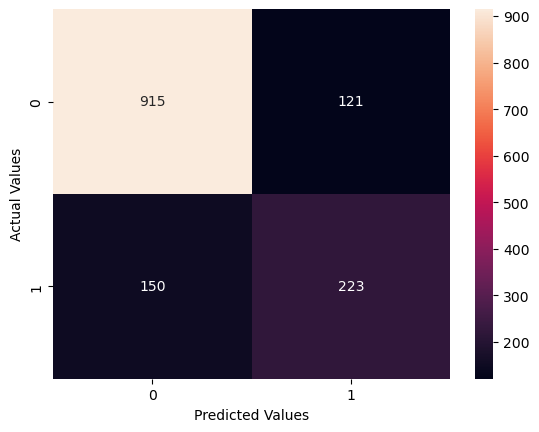

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8292    0.9093    0.8674      1036
           1     0.6557    0.4799    0.5542       373

    accuracy                         0.7956      1409
   macro avg     0.7425    0.6946    0.7108      1409
weighted avg     0.7833    0.7956    0.7845      1409

Confusion Matrix:
 [[942  94]
 [194 179]]

Cross-Validation F1 Scores: [0.60854093 0.56015779 0.54442344 0.55743879 0.51689861]
Mean CV Score - Initial Model Training: 55.75%
--------------------------------------------------


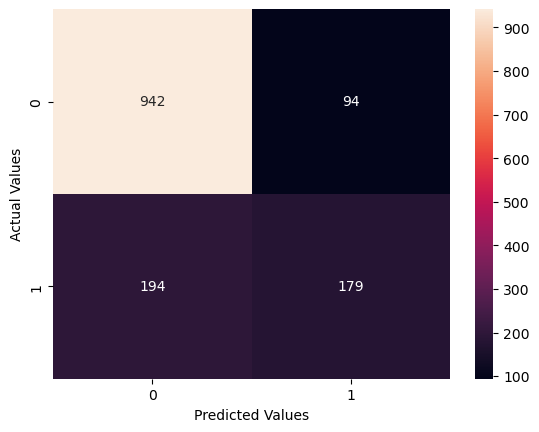

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8098    0.8012    0.8054      1036
           1     0.4635    0.4772    0.4703       373

    accuracy                         0.7154      1409
   macro avg     0.6366    0.6392    0.6379      1409
weighted avg     0.7181    0.7154    0.7167      1409

Confusion Matrix:
 [[830 206]
 [195 178]]

Cross-Validation F1 Scores: [0.53271028 0.47097844 0.48874598 0.5229794  0.47840532]
Mean CV Score - Initial Model Training: 49.88%
--------------------------------------------------


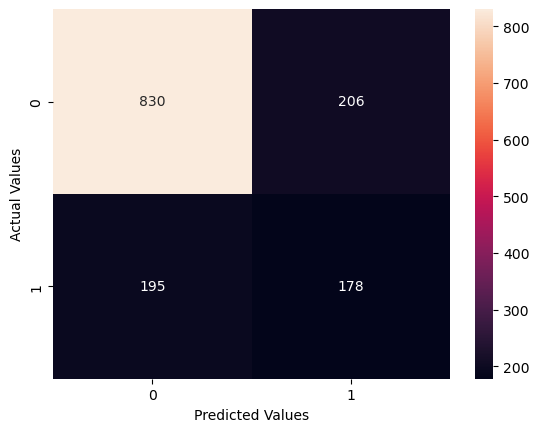

<-- XGBoost Classifier -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8376    0.8861    0.8612      1036
           1     0.6230    0.5228    0.5685       373

    accuracy                         0.7899      1409
   macro avg     0.7303    0.7044    0.7148      1409
weighted avg     0.7808    0.7899    0.7837      1409

Confusion Matrix:
 [[918 118]
 [178 195]]

Cross-Validation F1 Scores: [0.61406518 0.53256705 0.52536232 0.55714286 0.51492537]
Mean CV Score - Initial Model Training: 54.88%
--------------------------------------------------


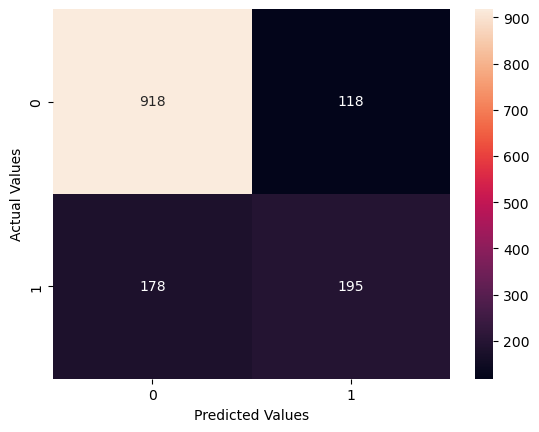

In [654]:
# Train, test, and evaluate the models - I will use the 'for loop' to iterate through the models
for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model = classifier[0]
    model_name = classifier[1]
    
    # Re - Train the model
    model.fit(X_train, y_train)
    
    # Test the Model - Make predictions
    y_pred = model.predict(X_test)
    
    # Model Evaluation - Print classification report and confusion matrix
    report = classification_report(y_test, y_pred, digits = 4)
    matrix = confusion_matrix(y_test, y_pred)
    print('Classification Report:\n', report)
    print('Confusion Matrix:\n', matrix)
    
    # Cross-Validate Models
    # (Cross-validation evaluates a model's reliability by testing it on different data subsets, reducing overfitting,
    # and providing a more accurate estimate of its performance on unseen data.)
    cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring ='f1')
    mean_cv_score_percentage = cv_scores.mean() * 100
    print(f'\nCross-Validation F1 Scores: {cv_scores}')
    print(f'Mean CV Score - Initial Model Training: {mean_cv_score_percentage:.2f}%')
    print("-" * 50)
    
    # Document Insights
    with open('Initial_Model_Training_log.txt', 'a') as log_file:  # 'a' mode for appending
        log_file.write(f'{model_name} - Initial_Model_Training\n')
        log_file.write(f'Classification Report:\n{report}\n')
        log_file.write(f'Confusion Matrix:\n{matrix}\n')
        log_file.write(f'Cross-Validation F1 Scores: {cv_scores}\n')
        log_file.write(f'Mean CV Score - Initial Model Training:  {mean_cv_score_percentage:.2f}%\n')
        log_file.write("-" * 50 + "\n")
    
    # Visual the Confusion Matrix
    sns.heatmap(matrix, annot = True, fmt = 'g')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    
    plt.show()

##### Model Performance Insights from Initial Model Training
---
Logistic Regression:

- Strengths: High precision (85.92%) and recall (88.32%) for non-churners, indicating effective detection of non-churners.
- Weaknesses: Lower precision (64.83%) and recall (59.79%) for churners, suggesting a need for improvement in predicting churners.
- Mean CV Score: 57.52%, indicating moderate consistency in model performance across different data splits.
- Confusion Matrix Insight: The model correctly identified 223 churners (TP) but misclassified 150 churners as non-churners(FN).
---
Random Forest Classifier:

- Strengths: Good precision (82.92%) and recall (90.93%) for non-churners. indicating effective detection of non-churners.
- Weaknesses: Lower precision (65.57%) and recall (47.99%) for churners. This model also struggles with churn prediction.
- Mean CV Score: 55.75%, suggesting some variability in model performance.
- Confusion Matrix Insight: The model correctly identified 179 churners (TP) but misclassified 194 churners as non-churners(FN).
---
Decision Tree Classifier:

- Strengths: The model provides balanced performance across both classes, with decent accuracy (71.54%). It performs moderately well on detection of non-churners.
- Weaknesses: Lower precision (46.35%) and recall (47.72%) for churners compared to non-churners, indicating that the model struggles to identify churners accurately.
- Mean CV Score: 49.88%, reflecting a relatively inconsistent model performance.
- Confusion Matrix Insight: The model correctly classified 178 churners (TP) but misclassified 195 churners as non-churners(FN).
---
XGBoost Classifier:

- Strengths: The model has strong performance with good precision (83.76%) and recall (88.61%) for non-churners
- Weaknesses: The recall for the churners is moderate at (52.28%), meaning the model fails to capture all churners effectively.
- Mean CV Score: 54.88%, indicating a moderate but slightly variable model performance.
- Confusion Matrix Insight: The model correctly identified 195 churners(TP but misclassified 178 churners as non-churners(FN).
---
Key Observation:
1. Non-Churners (Majority Class (0)): All models perform well in predicting non-churners (Class 0), with high precision and recall.
2. Churners (Minority Class (1)): The models struggle to identify churners accurately, with lower precision and recall, leading to a higher number of false negative(FN). This primary concern across the 4 models can lead to significant business losses if not addressed..
3. The ranking of the models by Mean CV Score highlights that Logistic Regression and Random Forest exhibit the highest Mean CV Scores, indicating they are the most consistent models across different data splits. XGBoost follows closely, while Decision Tree has the lowest score, reflecting its higher variability and potential unreliability.
---
#### Next Steps:  - Model Improvement Tasks

1. Feature Scaling
    - Re-train with Selected Features
    - Re-evaluate Models
---
These steps will help improve model accuracy and efficiency, particularly in reducing false negatives and ensuring better prediction of customer churn.

### Feature Scaling to see if it will improve the model performance
- Using StandardScaler to standardize features(to have a mean of 0 and a variance of 1) for models and ensure that features contribute equally to the models.

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8553    0.9015    0.8778      1036
           1     0.6782    0.5764    0.6232       373

    accuracy                         0.8155      1409
   macro avg     0.7668    0.7390    0.7505      1409
weighted avg     0.8084    0.8155    0.8104      1409

Confusion Matrix:
 [[934 102]
 [158 215]]

Cross-Validation F1 Scores: [0.625      0.60560748 0.55514706 0.57042254 0.57627119]
Mean CV Score - After Scaling: 58.65%
--------------------------------------------------


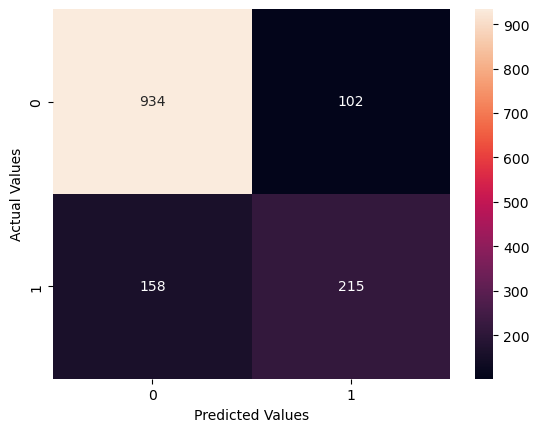

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8298    0.9083    0.8673      1036
           1     0.6545    0.4826    0.5556       373

    accuracy                         0.7956      1409
   macro avg     0.7422    0.6954    0.7114      1409
weighted avg     0.7834    0.7956    0.7848      1409

Confusion Matrix:
 [[941  95]
 [193 180]]

Cross-Validation F1 Scores: [0.60357143 0.55621302 0.54166667 0.5530303  0.51394422]
Mean CV Score - After Scaling: 55.37%
--------------------------------------------------


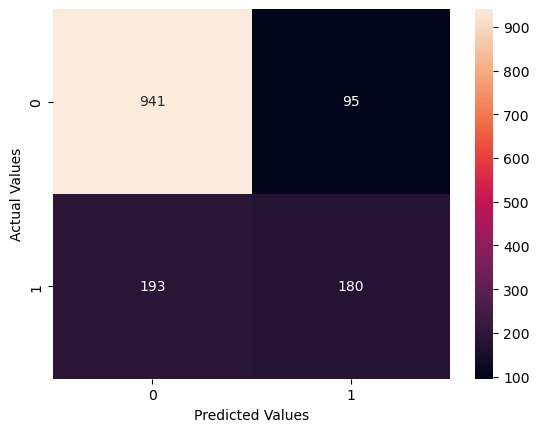

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8090    0.8012    0.8050      1036
           1     0.4621    0.4745    0.4683       373

    accuracy                         0.7147      1409
   macro avg     0.6356    0.6378    0.6366      1409
weighted avg     0.7172    0.7147    0.7159      1409

Confusion Matrix:
 [[830 206]
 [196 177]]

Cross-Validation F1 Scores: [0.534375   0.47019868 0.48796148 0.5221519  0.48092869]
Mean CV Score - After Scaling: 49.91%
--------------------------------------------------


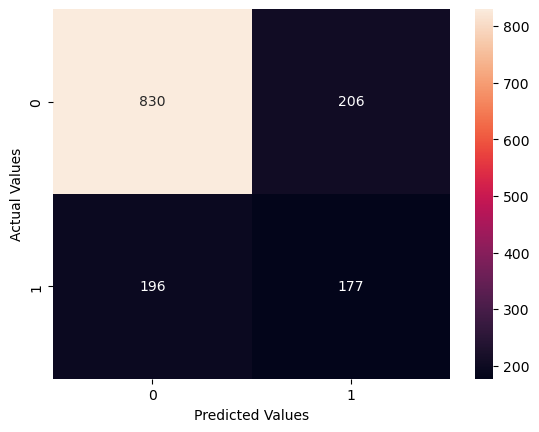

<-- XGBoost Classifier -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8376    0.8861    0.8612      1036
           1     0.6230    0.5228    0.5685       373

    accuracy                         0.7899      1409
   macro avg     0.7303    0.7044    0.7148      1409
weighted avg     0.7808    0.7899    0.7837      1409

Confusion Matrix:
 [[918 118]
 [178 195]]

Cross-Validation F1 Scores: [0.61406518 0.53256705 0.52536232 0.55714286 0.51492537]
Mean CV Score - After Scaling: 54.88%
--------------------------------------------------


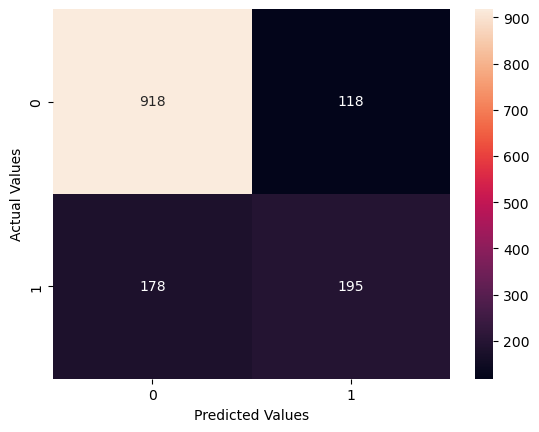

In [656]:
# # Initialize the Scaler and Scale training data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#print(f'X_train_scaled:')
#print(X_train_scaled)
#print(f'\nX_test_scaled:')
#print(X_test_scaled)

# Initialize the classifiers in a list and train the models
classifiers = [[LogisticRegression(random_state = 42), 'Logistic Regression'],
               [RandomForestClassifier(random_state = 42), 'Random Forest'],
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
               [XGBClassifier(random_state = 42), 'XGBoost Classifier'],
              ]

# Re-train models with scaled data
for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model = classifier[0]
    model_name = classifier[1]
    
    # Re - Train the model
    model.fit(X_train_scaled, y_train)
    
    # Test the Model - Make predictions
    y_pred = model.predict(X_test_scaled)

    # Model Evaluation - Print classification report and confusion matrix
    report = classification_report(y_test, y_pred, digits = 4)
    matrix = confusion_matrix(y_test, y_pred)
    print('Classification Report:\n', report)
    print('Confusion Matrix:\n', matrix)
    
    # Cross-Validate Models
    # (Cross-validation evaluates a model's reliability by testing it on different data subsets, reducing overfitting,
    # and providing a more accurate estimate of its performance on unseen data.)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring ='f1')
    mean_cv_score_percentage = cv_scores.mean() * 100
    print(f'\nCross-Validation F1 Scores: {cv_scores}')
    print(f'Mean CV Score - After Scaling: {mean_cv_score_percentage:.2f}%')
    print("-" * 50)
    
    # Document Insights
    with open('After_Scaling_log.txt', 'a') as log_file:  # 'a' mode for appending
        log_file.write(f'{model_name} - After Scaling\n')
        log_file.write(f'Classification Report:\n{report}\n')
        log_file.write(f'Confusion Matrix:\n{matrix}\n')
        log_file.write(f'Cross-Validation F1 Scores: {cv_scores}\n')
        log_file.write(f'Mean CV Score - After Scaling: {mean_cv_score_percentage:.2f}%\n')
        log_file.write("-" * 50 + "\n")
    
    # Visual the Confusion Matrix
    sns.heatmap(matrix, annot = True, fmt = 'g')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    
    plt.show()

##### Model Performance Insights after Feature Scaling
---
Logistic Regression:
  - Before Scaling: Accuracy: 80.77%, Mean CV F1 Score: 57.52%
  - After Scaling: Accuracy: 81.55%, Mean CV F1 Score: 58.65%
- Insight: Feature scaling slightly improved the model's performance, with a modest increase in both accuracy and mean cross-validation F1 score.
---
Random Forest Classifier:
  - Before Scaling: Accuracy: 79.56%, Mean CV F1 Score: 55.75%
  - After Scaling: Accuracy: 79.56%, Mean CV F1 Score: 55.37%
- Insight: Feature scaling did not significantly improve the model’s performance. While accuracy remained the same, the mean cross-validation F1 score slightly decreased.
---
Decision Tree Classifier:
  - Before Scaling: Accuracy: 71.54%, Mean CV F1 Score: 49.88%
  - After Scaling: Accuracy: 71.47%, Mean CV F1 Score: 49.91%
- Insight: Feature scaling had a minimal effect on the model’s performance, with very little change in both accuracy and mean cross-validation F1 score.
---
XGBoost Classifier:
   - Before Scaling: Accuracy: 78.99%, Mean CV F1 Score: 54.88%
   - After Scaling: Accuracy: 78.99%, Mean CV F1 Score: 54.88%
- Insight: Feature scaling did not improve the model’s performance, as both accuracy and the mean cross-validation F1 score remained almost identical.
---
- Overall Conclusion: Feature scaling provided a noticeable improvement for Logistic Regression but had minimal or no impact on the other models.
---
Class Imbalance Effect:
- The models continue to perform poorly on the minority class (1) - Churners, as reflected in the lower recall and F1 scores. Adjusting class weights to address class imbalance could enhance model performance, particularly for Logistic Regression, which has already shown improvement with feature scaling.
---
Model Consideration Before Addressing Class Imbalance:
- The Decision Tree model consistently underperforms with low accuracy and mean cross-validation F1 scores. It will be dropping this model before moving forward.
- I will retain Logistic Regression, Random Forest, and XGBoost and focus on adjusting class imbalance to enhance their predictive performance.
---
#### Next Steps:  - Model Improvement Tasks

2. Addressing Target Class Imbalance by adjusting Class Weight
    - Re-train with Selected Features
    - Re-evaluate Models

###### Addressing Target Class Imbalance by adjusting Class Weight.
- The key observation from the intial model training and model training after scaling, is that all models performed well in predicting non-churners (Class 0), with high precision and recall but poor in predictint churners (Class 1). This shows that there could be class imbalance in the Churn feature which is greatly affecting the model performance.
- Class Weight will be used to address this imbalance.
- Re-train and Re-evaluate Model

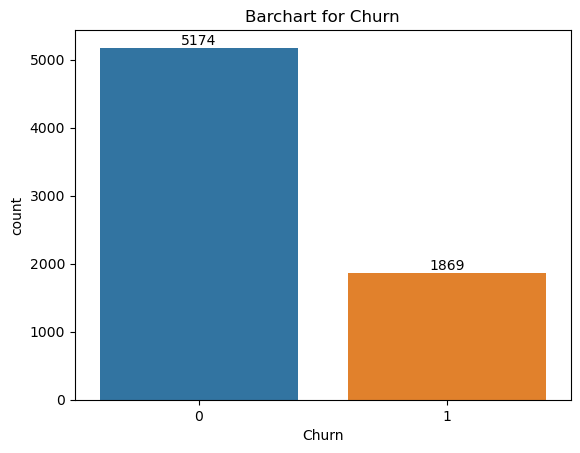

In [657]:
# Visualing to see how class inbalance affects the model
ax = sns.countplot(x ="Churn", data = clean_cust_data)
plt.title('Barchart for Churn')
ax.bar_label(ax.containers[0]);

In [662]:
# Calculate scale_pos_weight for XGBoost - This helps XGBosst helps handle the imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
# Calculate class weight for Logistic Regression and Random Forest
weight = 'balanced' # - This helps to balance the contribution of each class to the model's training process

In [663]:
# Initialize models with class weights - Using Balanced and scale_pos_weight for misclassifying class 1(Churners)
classifiers = [[LogisticRegression(random_state = 42, class_weight = 'balanced'), 'Logistic Regression'],
               [RandomForestClassifier(random_state = 42, class_weight = 'balanced'), 'Random Forest'],
               [XGBClassifier(random_state = 42, scale_pos_weight = scale_pos_weight), 'XGBoost Classifier'],
              ]

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0     0.9252    0.7288    0.8153      1036
           1     0.5261    0.8365    0.6460       373

    accuracy                         0.7573      1409
   macro avg     0.7257    0.7826    0.7306      1409
weighted avg     0.8196    0.7573    0.7705      1409

Confusion Matrix:
 [[755 281]
 [ 61 312]]

Cross-Validation F1 Scores: [0.64402516 0.61340206 0.62303665 0.61381074 0.61517615]
Mean CV Score - Address Class Imbalance: 62.19%
--------------------------------------------------


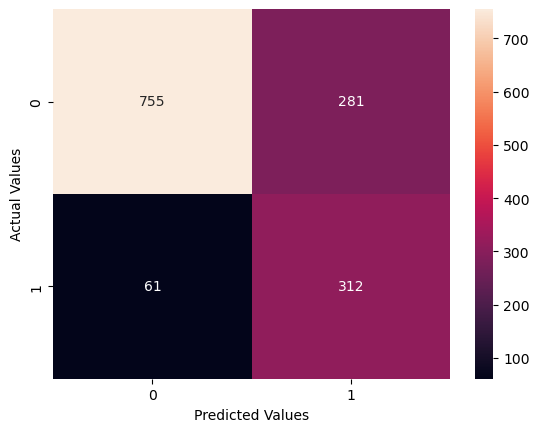

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8270    0.9093    0.8662      1036
           1     0.6519    0.4718    0.5474       373

    accuracy                         0.7935      1409
   macro avg     0.7394    0.6906    0.7068      1409
weighted avg     0.7807    0.7935    0.7818      1409

Confusion Matrix:
 [[942  94]
 [197 176]]

Cross-Validation F1 Scores: [0.60218978 0.54582485 0.52793834 0.53742802 0.51115619]
Mean CV Score - Address Class Imbalance: 54.49%
--------------------------------------------------


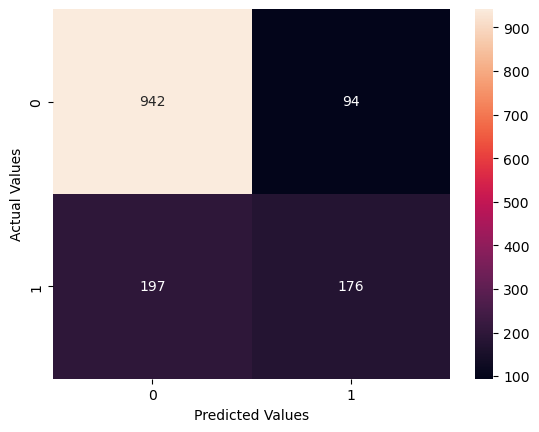

<-- XGBoost Classifier -->
Classification Report:
               precision    recall  f1-score   support

           0     0.8694    0.8031    0.8349      1036
           1     0.5487    0.6649    0.6012       373

    accuracy                         0.7665      1409
   macro avg     0.7090    0.7340    0.7181      1409
weighted avg     0.7845    0.7665    0.7731      1409

Confusion Matrix:
 [[832 204]
 [125 248]]

Cross-Validation F1 Scores: [0.61111111 0.57416268 0.57589984 0.5813253  0.5696    ]
Mean CV Score - Address Class Imbalance: 58.24%
--------------------------------------------------


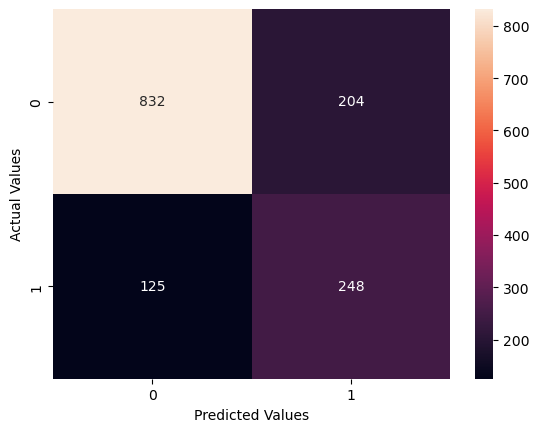

In [664]:
# Re - train, Re - evaluate, and cross-validate models
for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model = classifier[0]
    model_name = classifier[1]
    
    # Re - Train the model
    model.fit(X_train_scaled, y_train)
    
    # Test the Model - Make predictions
    y_pred = model.predict(X_test_scaled)

    # Model Evaluation - Print classification report and confusion matrix
    report = classification_report(y_test, y_pred, digits = 4)
    matrix = confusion_matrix(y_test, y_pred)
    print('Classification Report:\n', report)
    print('Confusion Matrix:\n', matrix)
    
    # Cross-Validate Models
    # (Cross-validation evaluates a model's reliability by testing it on different data subsets, reducing overfitting,
    # and providing a more accurate estimate of its performance on unseen data.)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring ='f1')
    mean_cv_score_percentage = cv_scores.mean() * 100
    print(f'\nCross-Validation F1 Scores: {cv_scores}')
    print(f'Mean CV Score - Address Class Imbalance: {mean_cv_score_percentage:.2f}%')
    print("-" * 50)
    
    # Document Insights
    with open('Address_Class_Imbalance_log.txt', 'a') as log_file:  # 'a' mode for appending
        log_file.write(f'{model_name} - Address Class Imbalance\n')
        log_file.write(f'Classification Report:\n{report}\n')
        log_file.write(f'Confusion Matrix:\n{matrix}\n')
        log_file.write(f'Cross-Validation F1 Scores: {cv_scores}\n')
        log_file.write(f'Mean CV Score - Address Class Imbalance: {mean_cv_score_percentage:.2f}%\n')
        log_file.write("-" * 50 + "\n")
    
    # Visual the Confusion Matrix
    sns.heatmap(matrix, annot = True, fmt = 'g')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    
    plt.show()


##### Model Performance Insights after Addressing Class Imbalance
---
Logistic Regression: 
- Addressing class imbalance led to notable improvement. The recall for the minority class (1) - Churners increased significantly from 59.79% to 83.65%, and the mean cross-validation F1 score rose from 57.52% to 62.19%.
- Leading to better performance overall with increase in the prediction of churners(TP) to 312 from 215 and a reduction in prediction of False Negative (FN) from 158 to 61
---
Random Forest: 
- Addressing class imbalance resulted in a slight improvement in recall for the minority class (1) - Churners but did not substantially enhance the overall performance. The mean cross-validation F1 score decreased slightly from 55.75% to 54.49%.
---
XGBoost: 
- Addressing class imbalance showed some improvement in recall for the minority class (1) - Churners, and the mean cross-validation F1 score increased from 54.88% to 58.24%.
---
Hyperparameter Tuning: 
- Given the performance improvements observed with addressing class imbalance, focusing on hyperparameter tuning could further enhance model performance.
---
#### Next Steps:  - Model Improvement Tasks
3. Hyperparameter Tuning
    - Re-train with Selected Features
    - Re-evaluate Models

### Hyperparameter Tuning
- To ensure that a model performs at its best by systematically exploring different configurations and optimizing its predictive capabilities. Hyperparameter tuning helps in:
1. Enhancing Performance
2. Avoiding Overfitting/Underfitting
3. Maximizing Efficiency


In [718]:
# Define the hyperparameter grids for each model
hyperparameter_settings = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
        'penalty': ['l1', 'l2'],  # Regularization type: 'l1' for Lasso, 'l2' for Ridge
        'solver': ['liblinear'],  # 'liblinear' is compatible with l1 penalty
        'class_weight': [None, 'balanced']  # Add class_weight to handle class imbalance
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
        'class_weight': [None, 'balanced', 'balanced_subsample']  # Add class_weight to handle class imbalance
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 200],  # Number of boosting rounds
        'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
        'max_depth': [3, 6, 9],  # Maximum depth of a tree
        'scale_pos_weight': [1, 2, 4]  # Handle class imbalance
    }
}

In [719]:
# Initialize models
classifiers = {
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced'),
    'RandomForestClassifier': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBClassifier': XGBClassifier(random_state=42)
}

In [720]:
# Create the param_grids dynamically
param_grids = {
    model_name: params for model_name, params in hyperparameter_settings.items()
}

# Print param_grids to verify
print("Parameter Grids:")
param_grids

Parameter Grids:


{'LogisticRegression': {'C': [0.01, 0.1, 1, 10, 100],
  'penalty': ['l1', 'l2'],
  'solver': ['liblinear'],
  'class_weight': [None, 'balanced']},
 'RandomForestClassifier': {'n_estimators': [50, 100, 200],
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'class_weight': [None, 'balanced', 'balanced_subsample']},
 'XGBClassifier': {'n_estimators': [50, 100, 200],
  'learning_rate': [0.01, 0.1, 0.2],
  'max_depth': [3, 6, 9],
  'scale_pos_weight': [1, 2, 4]}}

In [721]:
# Function to perform GridSearchCV and return model results
def tune_and_evaluate(model, model_name, param_grid, X_train_scaled, y_train, X_test_scaled, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')  # Grid search with 5-fold cross-validation
    print(f"Tuning {model_name}...")  # Print model name being tuned
    grid_search.fit(X_train_scaled, y_train)  # Fit the model using GridSearchCV
    
    best_model = grid_search.best_estimator_  # Get the best model after tuning
    y_pred = best_model.predict(X_test_scaled)  # Predict on the test set
    
    # Generate performance metrics
    report = classification_report(y_test, y_pred)  # Classification report for precision, recall, and F1 score
    matrix = confusion_matrix(y_test, y_pred)  # Confusion matrix to summarize prediction results
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='f1')  # Cross-validation F1 scores
    mean_cv_score = np.mean(cv_scores) * 100  # Convert mean CV F1 score to percentage
    
    return {
        'model_name': model_name,
        'classification_report': report,
        'confusion_matrix': matrix,
        'cross_val_scores': cv_scores,
        'mean_cv_score': mean_cv_score
    }

In [722]:
# Create a dictionary for models
models = dict(classifiers)

In [723]:
# Ensure that the model names in 'models' match the keys in 'param_grids'
for model_name in models.keys():
    if model_name not in param_grids:
        raise KeyError(f"Model name '{model_name}' is not found in hyperparameter settings.")

Tuning LogisticRegression...
Tuning RandomForestClassifier...
Tuning XGBClassifier...


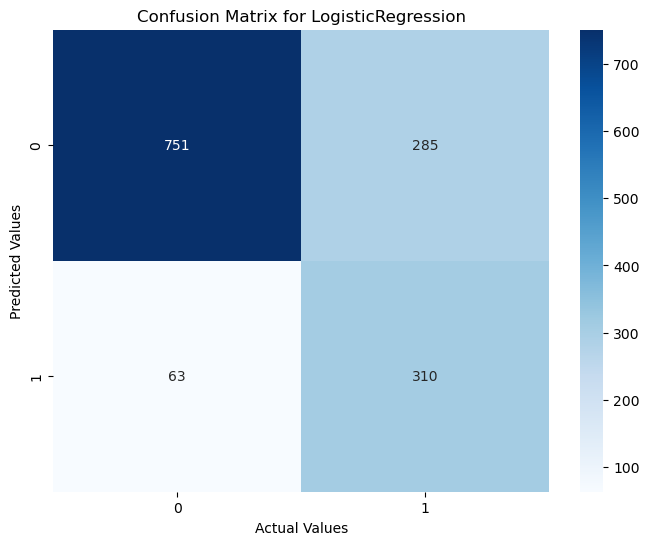

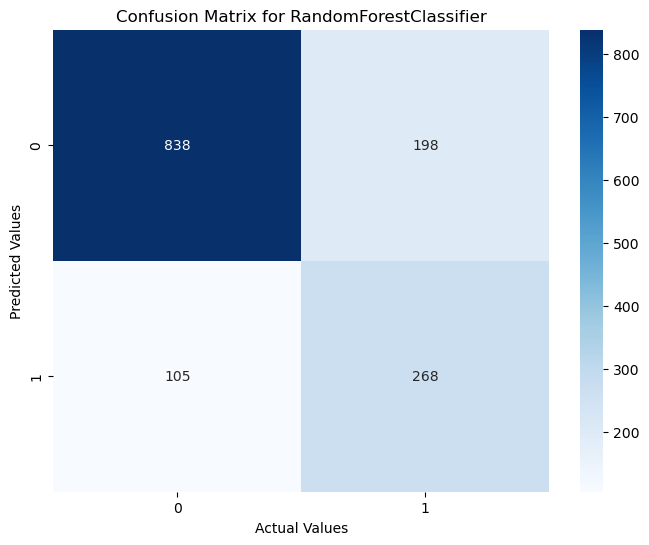

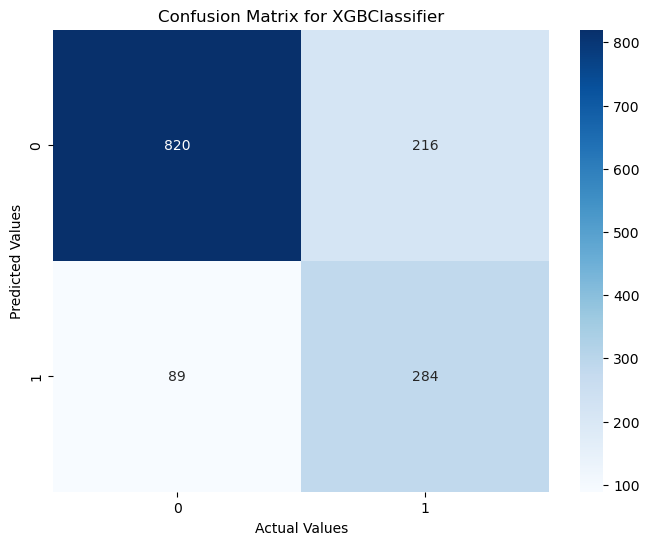

In [724]:
# Run hyperparameter tuning for each model and collect results
all_insights = {model_name: tune_and_evaluate(
    model,
    model_name,
    param_grids[model_name],
    X_train_scaled,  # Scaled training data
    y_train,
    X_test_scaled,  # Scaled test data
    y_test
) for model_name, model in models.items()}  # Dictionary comprehension to store results for all models

# Log the insights to a file
log_filename = 'Hyperparameter_Tuning_log.txt'  # File to save tuning insights
with open(log_filename, 'a') as log_file:
    for insight in all_insights.values():
        model_name = insight['model_name']
        log_file.write(f'{model_name} - After Hyperparameter Tuning\n')
        log_file.write(f'Classification Report:\n{insight["classification_report"]}\n')
        log_file.write(f'Confusion Matrix:\n{insight["confusion_matrix"]}\n')
        log_file.write(f'Cross-Validation F1 Scores: {insight["cross_val_scores"]}\n')
        log_file.write(f'Mean CV Score - After Hyperparameter Tuning: {insight["mean_cv_score"]:.2f}%\n')
        log_file.write("-" * 50 + "\n")

# Plot confusion matrices for all models
for insight in all_insights.values():
    model_name = insight['model_name']
    matrix = insight['confusion_matrix']
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')  # Plot heatmap of confusion matrix
    plt.xlabel('Actual Values')  # X-axis label
    plt.ylabel('Predicted Values')  # Y-axis label
    plt.title(f'Confusion Matrix for {model_name}')  # Title of the plot
    plt.show()  # Display the plot

##### Model Performance Insights After Hyperparameter Tuning
---
Improvement Observed:
- Logistic Regression: After hyperparameter tuning, the F1-score and overall cross-validation (CV) mean score for the positive class (1, representing churn) improved slightly. The F1-score increased, and the CV score reached 62.14% from 62.19% after addressing class imbalance.
- Random Forest and XGBoost: Both models saw slight improvements in the F1-score and CV scores after hyperparameter tuning. The Random Forest classifier’s mean CV score improved from 54.49% to 62.42%, and XGBoost improved from 58.24% to 62.73%.
---
- No Significant Change: The overall accuracy and balance between precision and recall remained relatively stable, with minor improvements that do not indicate a major shift in model performance.
---
Need for Further Improvement:
- Despite modest gains from hyperparameter tuning, F1-scores for the positive class remain moderate across all models. More improvement is essential to further reduce false negatives and increase true positives, particularly to improve recall for accurately identifying customers likely to churn.

# Summary of the Insights from Model Building

###### 1. Model Performance Progression

Initial Model Training:
- The initial model training established a baseline for performance across several classifiers.
- Logistic Regression performed reasonably well, but it struggled with false negatives (FN), which is critical in churn prediction.
- XGBoost also showed promise, but like the other models (Random Forest and Decision Tree), it faced challenges in accurately identifying positive churn cases.

After Feature Scaling:
- Applying standard scaling slightly improved the performance of Logistic Regression, increasing both precision and recall.
- However, the impact on other models, such as Random Forest and Decision Tree, was minimal.
- XGBoost maintained its performance level, indicating that it was less sensitive to feature scaling.
- Decision Tree was dropped at this point because of it continuous poor performance.

Addressing Class Imbalance:
- Adjusting for class imbalance significantly improved recall for the positive class (churn).
- Logistic Regression saw a substantial increase in recall from 57.64% to 83.65%, though this was at the cost of reduced precision.
- XGBoost also benefited from this adjustment, showing improved recall and better identification of churn cases.

Hyperparameter Tuning:
- Hyperparameter tuning led to further improvements, particularly in XGBoost and RandomForestClassifier.
- These models achieved better balance between precision and recall, resulting in higher overall accuracy.
- XGBoost emerged as the best-performing model, with a mean cross-validation F1 score of 62.73%, demonstrating its ability to - generalize well across different data subsets.
---

###### 2. Challenges and Limitations

Class Imbalance Trade-offs:
- Addressing class imbalance was crucial for improving churn prediction. However, this introduced a trade-off between precision and recall.
- While more churn cases were identified, there was an increase in false positives, indicating a need for careful balancing in future iterations.

Hyperparameter Tuning Complexity:
- While beneficial, hyperparameter tuning required careful consideration to avoid overfitting.
- The improvements were incremental, suggesting that future work could benefit from exploring more sophisticated methods, such as ensemble approaches or advanced resampling techniques.
---

# SUMARRY FOR SUBMISSION
---
PROJECT OVERVIEW:
- The objective of the ConnectTel Customer Churn Prediction project was to develop a predictive model capable of accurately identifying customers at risk of churning. Through a comprehensive approach involving multiple stages — Data Cleaning and Preparation, EDA, Feature Engineering, initial model training, feature scaling, class imbalance handling, and hyperparameter tuning — I optimized several models to achieve the best possible performance.
---

KEY ACHIEVEMENTS:

XGBoost Performance:
- XGBoost, after hyperparameter tuning, emerged as the top-performing model, achieving an F1 score of 0.65 for the positive class and an overall accuracy of 78%.
- This model was particularly effective in reducing false negatives, aligning well with ConnectTel’s goal of better predicting customer churn.
---

RECOMMENDATIONS FOR FUTURE WORK:

Further Model Refinement:
- Future iterations should explore more advanced techniques, to capture more complex patterns in the data.

Data Augmentation:
- Incorporating additional features could offer deeper insights into churn behavior and further enhance model performance.

Real-time Monitoring:
- Implementing a real-time monitoring system based on the trained model would enable ConnectTel to continuously assess customer churn risk and take proactive measures to retain customers.
---

CONCLUSION:
- In conclusion, the project successfully identified a robust model for predicting customer churn, with XGBoost showing the most promise. Although challenges remain, particularly in balancing precision and recall, the groundwork laid in this project provides a strong foundation for ConnectTel to enhance its customer retention strategies.